# Master in Science in Data Analytics for Business - CA2

###  Data Preparation & Visualisation &  Machine Learning

**Student:** Wendy Paola Espinoza Potoy 
**ID:** 2021133

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

# Passenger Journeys by Public Transport Dublin Ireland dataset

In [2]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
passenger_journeys = pd.read_csv("passenger_journey.csv" , na_values = missing_value_formats,  dtype={'VALUE': float})

In [3]:
#Check the 5 first rows of the dataset
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0


# Exploratory Data Analysis

In [4]:
#Check shape of the data in this case dataset has 1040 rows and 5 columns
passenger_journeys.shape

(1040, 5)

In [5]:
#Check information general of the dataset (data types, range of index, information of the columns and the memory used)
passenger_journeys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Statistic Label    1040 non-null   object 
 1   Week               1040 non-null   object 
 2   Mode of Transport  1040 non-null   object 
 3   UNIT               1040 non-null   object 
 4   VALUE              976 non-null    float64
dtypes: float64(1), object(4)
memory usage: 40.8+ KB


In [6]:
#Check the measures of central tendency and measures of dispersion 
passenger_journeys.describe()

,VALUE
count,9.760000e+02
mean,1.755135e+06
std,1.435038e+06
min,2.323100e+04
25%,6.167142e+05
50%,9.525170e+05
75%,2.992955e+06
max,5.488658e+06


In [7]:
#Check the unique values of each columns in the dataset.
passenger_journeys.nunique()

Statistic Label        1
Week                 260
Mode of Transport      4
UNIT                   1
VALUE                975
dtype: int64

In [8]:
#Check the data types of the dataset to see how many differents dtypes exist and if is required to transform to a different type for further analysis. 
passenger_journeys.dtypes

Statistic Label       object
Week                  object
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

In [9]:
#Check missing values this fucntion will check all the null values and each column and sum up them. 
#64 missing values were detected in "VALUE" column

passenger_journeys.isnull().sum()

Statistic Label       0
Week                  0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [10]:
#This function is used to returs the numbers of times that a value appear in a list in the dataset. 
# Counting missing values =976 in "VALUE" column
passenger_journeys.count() 

Statistic Label      1040
Week                 1040
Mode of Transport    1040
UNIT                 1040
VALUE                 976
dtype: int64

In [11]:
#This function will show if there is any rows or colums that containing duplicate data.
duplicate_rows_df = passenger_journeys[passenger_journeys.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)


number of duplicate rows: (0, 5)


## Cleaning the data

Text(0.5, 1.0, 'Feature Statistics')

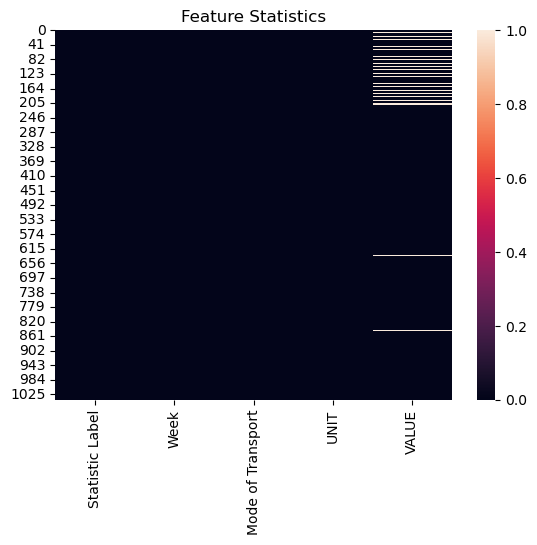

In [12]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(passenger_journeys.isnull())
plt.title("Feature Statistics")

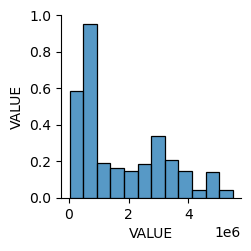

In [13]:
#Using a pairplot to check correlation and distrubution
#However,there is only 1 numerical variable
sns.pairplot(passenger_journeys)

# Data Preparation

In [14]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'
passenger_journeys['Year'] = passenger_journeys['Week'].str[:4]

In [15]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'

passenger_journeys['Week'] = passenger_journeys['Week'].str[5:]


# Drop 'Statistic Label' and 'UNIT' columns from dataset
passenger_journeys = passenger_journeys.drop(['Statistic Label', 'UNIT'], axis=1)

# Convert 'year' column to integer
passenger_journeys['Year'] = passenger_journeys['Year'].astype(int)

# Display the modified DataFrame
passenger_journeys.head()

,Week,Mode of Transport,VALUE,Year
0,Week 01,Dublin Metro Bus,1987891.0,2019
1,Week 01,"Bus, excluding Dublin Metro",497598.0,2019
2,Week 01,Rail,NaN,2019
3,Week 01,"All public transport, excluding LUAS",2485489.0,2019
4,Week 02,Dublin Metro Bus,2709579.0,2019


# Handling Missing values 

In [16]:
#Using Interpolation technique to fill missing values as the distribution is skewed
passenger_journeys['VALUE'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(passenger_journeys['VALUE'].head(10)) 

0    1987891.0
1     497598.0
2    1491543.5
3    2485489.0
4    2709579.0
5     633764.0
6    1988553.5
7    3343343.0
8    2784678.0
9     678097.0
Name: VALUE, dtype: float64


In [17]:
#Checking null values
passenger_journeys.isnull().sum()

Week                 0
Mode of Transport    0
VALUE                0
Year                 0
dtype: int64

In [18]:
#checking first 5 rows

passenger_journeys.head()

,Week,Mode of Transport,VALUE,Year
0,Week 01,Dublin Metro Bus,1987891.0,2019
1,Week 01,"Bus, excluding Dublin Metro",497598.0,2019
2,Week 01,Rail,1491543.5,2019
3,Week 01,"All public transport, excluding LUAS",2485489.0,2019
4,Week 02,Dublin Metro Bus,2709579.0,2019


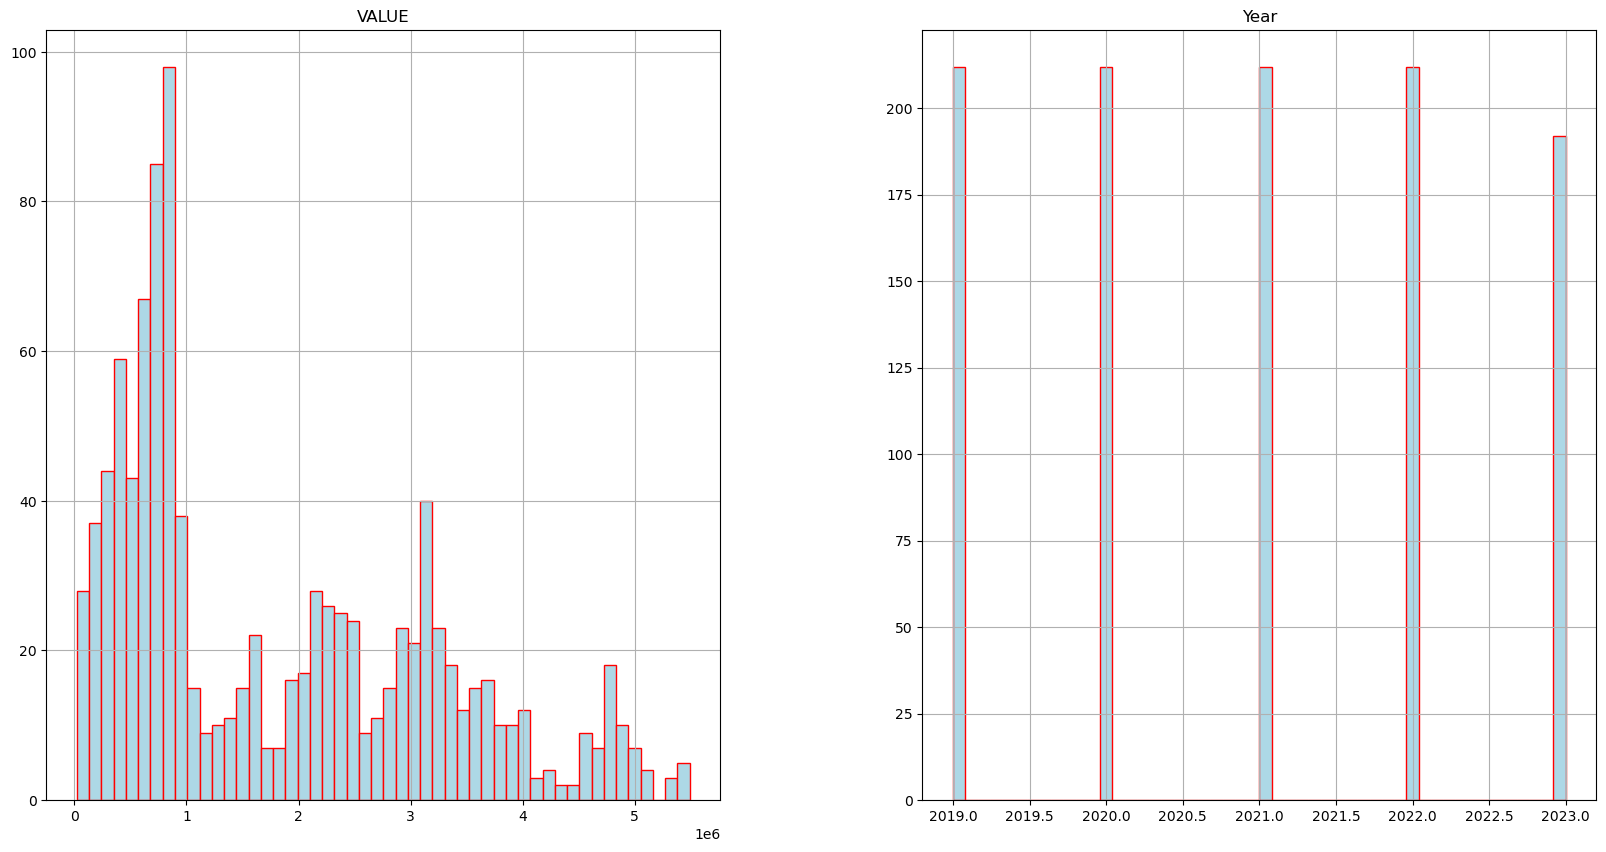

In [19]:
#Checking again to confirm filling the missing values did not change the distrubution
passenger_journeys.hist(bins=50, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Outliers

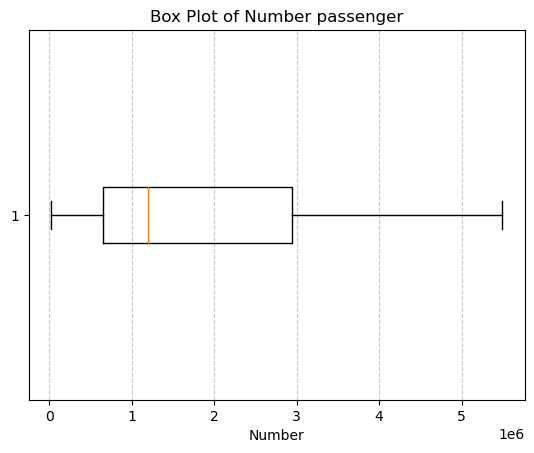

In [20]:
# No visual outliers
plt.boxplot(passenger_journeys['VALUE'], vert=False)
plt.title("Box Plot of Number passenger")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Encoding categorical variable 

In [21]:
#Create new dataframe with numerical values
Data_num = passenger_journeys[['Year','VALUE' ]]
Data_num

,Year,VALUE
0,2019,1987891.0
1,2019,497598.0
2,2019,1491543.5
3,2019,2485489.0
4,2019,2709579.0
...,...,...
1035,2023,5059620.0
1036,2023,3453532.0
1037,2023,941393.0
1038,2023,942218.0


In [22]:
#Creating new dataframe with catecorical values
passenger_journeys_objects =passenger_journeys.select_dtypes(object)
print(passenger_journeys_objects)

         Week                     Mode of Transport
0     Week 01                      Dublin Metro Bus
1     Week 01           Bus, excluding Dublin Metro
2     Week 01                                  Rail
3     Week 01  All public transport, excluding LUAS
4     Week 02                      Dublin Metro Bus
...       ...                                   ...
1035  Week 47  All public transport, excluding LUAS
1036  Week 48                      Dublin Metro Bus
1037  Week 48           Bus, excluding Dublin Metro
1038  Week 48                                  Rail
1039  Week 48  All public transport, excluding LUAS

[1040 rows x 2 columns]


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
#creating the storing of label encoding
le =LabelEncoder()

In [25]:
#creating a **for** loop to transform (hot encoding) all the values in passenger_journeys_objects at the same tome
for col in passenger_journeys_objects:
    le =LabelEncoder()
    passenger_journeys_objects[col]=le.fit_transform(passenger_journeys_objects[col])

In [26]:
#show new dataframe with encoding data
passenger_journeys_objects.head(10)

,Week,Mode of Transport
0,0,2
1,0,1
2,0,3
3,0,0
4,1,2
5,1,1
6,1,3
7,1,0
8,2,2
9,2,1


In [27]:
#create new dataframe to merge new encoding dataframes
passenger_journey_ireland = pd.merge(passenger_journeys_objects, Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))

In [28]:
# Specify the folder path
folder_path = 'C:\\Users\\wenyp\\OneDrive\\Documentos\\GitHub\\CA2_2023'

# Export the DataFrame to a CSV file in the specified folder
passenger_journey_ireland.to_csv(f'{folder_path}\\passenger_journey_ireland.csv', index=False)

passenger_journey_ireland.head()

,Week,Mode of Transport,Year,VALUE
0,0,2,2019,1987891.0
1,0,1,2019,497598.0
2,0,3,2019,1491543.5
3,0,0,2019,2485489.0
4,1,2,2019,2709579.0


# Data visualization

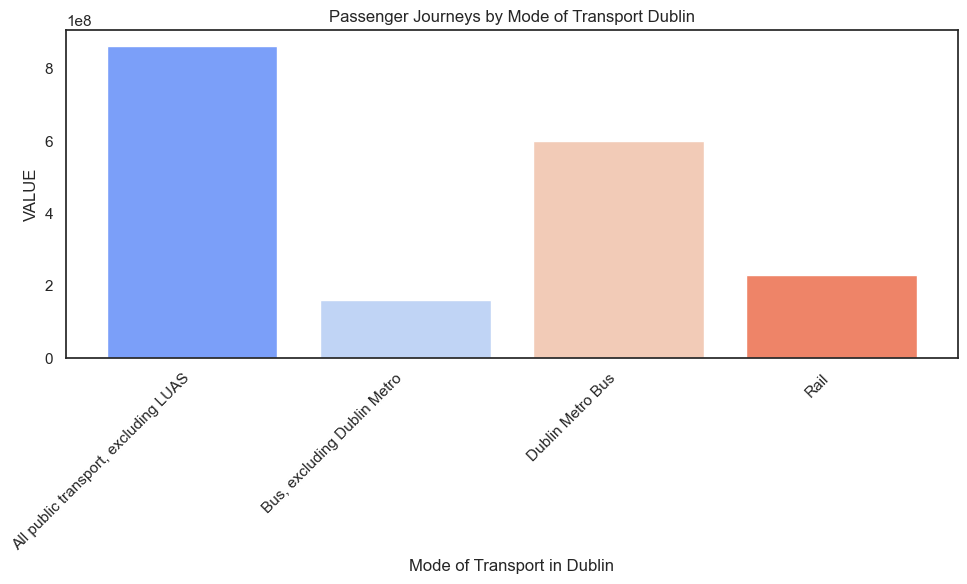

In [29]:
# Function to create Passenger Journeys by Mode of Transport Dublin plot

def create_passenger_journeys_plot(passenger_journeys):
    # Group by 'Mode of transport' and calculate the sum of 'VALUE' for each group
    number_passenger_group = passenger_journeys.groupby('Mode of Transport')['VALUE'].sum().reset_index()

    # Plotting
    sns.set_theme(style="white", palette=None)
    # Create a custom color palette
    colors_gb = sns.color_palette('coolwarm', n_colors=len(number_passenger_group))
    plt.figure(figsize=(10, 6))
    plt.bar(number_passenger_group['Mode of Transport'], number_passenger_group['VALUE'], color=colors_gb)
    plt.xlabel('Mode of Transport in Dublin')
    plt.ylabel('VALUE')
    plt.title('Passenger Journeys by Mode of Transport Dublin')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function with your dataset
create_passenger_journeys_plot(passenger_journeys)


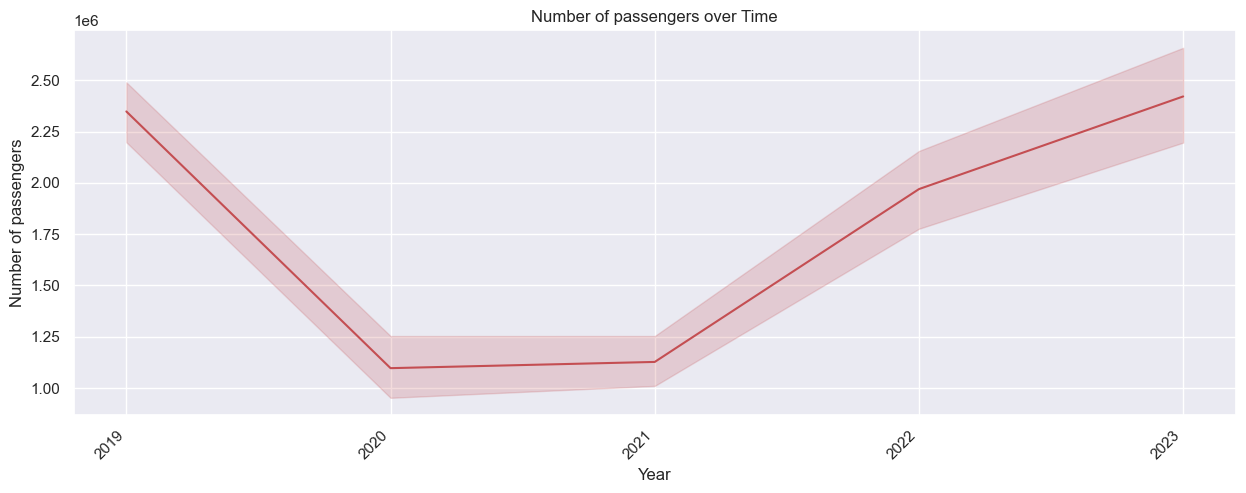

In [30]:
# Function to create Number of passengers over Time in Dublin plot
def plot_passengers_over_time(data):
    # Plotting a line plot to visualize Number of passenger journeys values over time
    sns.set_theme()
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=data, x="Year", y="VALUE", color="r")
    plt.title("Number of passengers over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of passengers")
    plt.grid(True)
    plt.xticks(data['Year'].unique(), rotation=45, ha='right')  
    plt.show()

# Call the function with your dataset
plot_passengers_over_time(passenger_journeys)


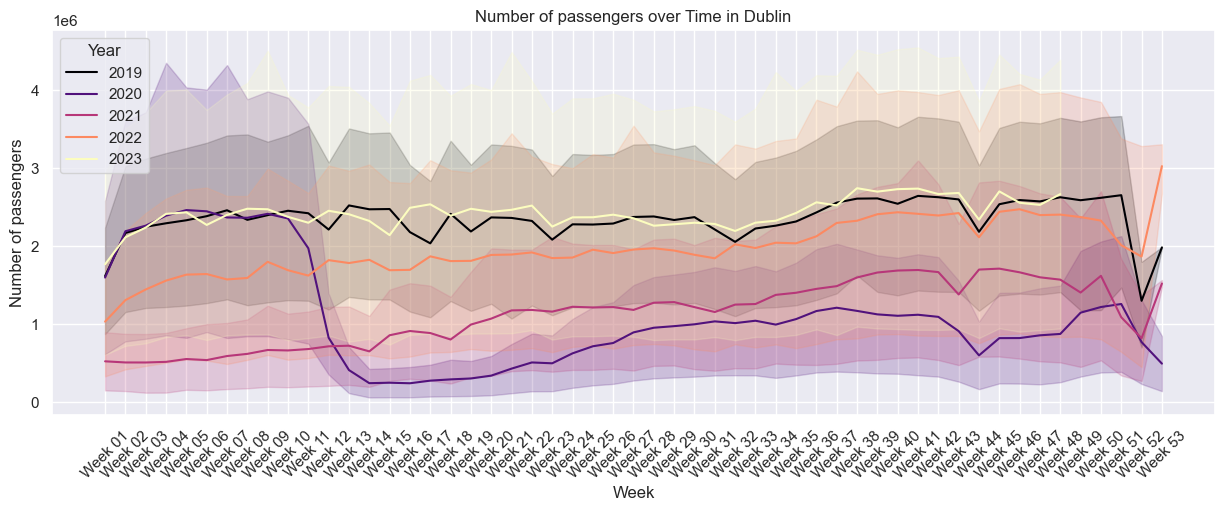

In [31]:
# Function to create Number of passengers over Time in Dublin (Weekly) plot

def create_passenger_over_time_weekly_plot(passenger_journeys):
    # Plotting a line plot to visualize Number of passenger journeys values over time
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=passenger_journeys, x="Week", y="VALUE", hue="Year", palette="magma")

    plt.title("Number of passengers over Time in Dublin")
    plt.xlabel("Week")
    plt.ylabel("Number of passengers")
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# Call the function with your dataset
create_passenger_over_time_weekly_plot(passenger_journeys)


## Unsupervised modelling

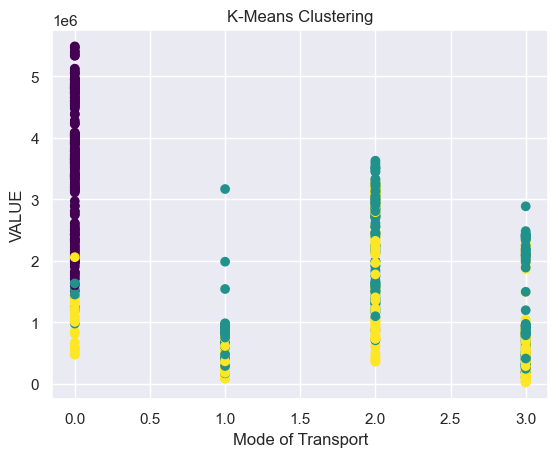

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Delcaring variable "X"
X = passenger_journey_ireland[['Week', 'Mode of Transport', 'Year', 'VALUE']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
passenger_journey_ireland['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize K-Means Clusters
plt.scatter(passenger_journey_ireland['Mode of Transport'], passenger_journey_ireland['VALUE'], c=passenger_journey_ireland['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Mode of Transport')
plt.ylabel('VALUE')
plt.show()


In [33]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled,  passenger_journey_ireland['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.24188120424380063


In [34]:
kmeans_inertia = kmeans.inertia_
print(f"K-Means Inertia: {kmeans_inertia}")

K-Means Inertia: 2489.222980343641


## Supervise Modelling 

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [36]:
# Declaration of Variables
X = passenger_journey_ireland[['Week', 'Mode of Transport', 'Year']]
y = passenger_journey_ireland['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Lineal Regression model 
linear_regressor = LinearRegression()
lasso_regressor = Lasso(alpha=0.1)
ridge_regressor = Ridge(alpha=1.0)

#Non-lineal Regression model 
rf_regressor = RandomForestRegressor(random_state=42)
svr_regressor = SVR()
knn_regressor = KNeighborsRegressor()
gb_regressor = GradientBoostingRegressor()

# List of models for iteration
#models = [linear_regressor, lasso_regressor, ridge_regressor, rf_regressor, svr_regressor, knn_regressor, gb_regressor]

Lineal_Regression_models = [linear_regressor, lasso_regressor, ridge_regressor] 
Non_Lineal_Regression_models=[rf_regressor, svr_regressor, knn_regressor, gb_regressor]

# Check results of Lineal Regression models
for model in Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Lineal Regression Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f"R-squared (R2) Score: {r2}")
    print('\n')

# Check results of Non-Lineal Regression models
for model in Non_Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Non-Lineal Regression Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f"R-squared (R2) Score: {r2}")
    print('\n')


Lineal Regression Model: LinearRegression
Mean Squared Error: 1524552547765.8096
R-squared (R2) Score: 0.22772773109581956


Lineal Regression Model: Lasso
Mean Squared Error: 1524552541248.371
R-squared (R2) Score: 0.22772773439727145


Lineal Regression Model: Ridge
Mean Squared Error: 1524592605763.5159
R-squared (R2) Score: 0.22770743944970884


Non-Lineal Regression Model: RandomForestRegressor
Mean Squared Error: 33014281565.152897
R-squared (R2) Score: 0.9832763953148576


Non-Lineal Regression Model: SVR
Mean Squared Error: 2217770308285.505
R-squared (R2) Score: -0.12342635247169365


Non-Lineal Regression Model: KNeighborsRegressor
Mean Squared Error: 1085030266393.2596
R-squared (R2) Score: 0.45037067637635275


Non-Lineal Regression Model: GradientBoostingRegressor
Mean Squared Error: 114729231076.76149
R-squared (R2) Score: 0.9418831422222037




In [37]:
models = [linear_regressor, lasso_regressor, ridge_regressor, rf_regressor, svr_regressor, knn_regressor, gb_regressor]

# Initialize variables to store the top three models
top_models_mse = [(None, float('inf'))] * 3  # List of (model, mse)
top_models_r2 = [(None, -float('inf'))] * 3  # List of (model, r2)

# Iterate through models and evaluate
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Update top models based on MSE
    top_models_mse.append((model, mse))
    top_models_mse.sort(key=lambda x: x[1])  # Sort by MSE and keep top 3
    top_models_mse = top_models_mse[:2]

    # Update top models based on R2 score
    top_models_r2.append((model, r2))
    top_models_r2.sort(key=lambda x: x[1], reverse=True)  # Sort by R2 score and keep top 3
    top_models_r2 = top_models_r2[:2]

# Print the top three models based on MSE
print('\nTop 2 Best Models based on Mean Squared Error:')
for i, (model, mse) in enumerate(top_models_mse, 1):
    print(f'{i}. Model: {type(model).__name__}, MSE: {mse}')

# Print the top three models based on R2 score
print('\nTop 2 Best Models based on R-squared (R2) Score:')
for i, (model, r2) in enumerate(top_models_r2, 1):
    print(f'{i}. Model: {type(model).__name__}, R2 Score: {r2}')



Top 2 Best Models based on Mean Squared Error:
1. Model: RandomForestRegressor, MSE: 33014281565.152897
2. Model: GradientBoostingRegressor, MSE: 114729231076.76154

Top 2 Best Models based on R-squared (R2) Score:
1. Model: RandomForestRegressor, R2 Score: 0.9832763953148576
2. Model: GradientBoostingRegressor, R2 Score: 0.9418831422222036


## Model 1: Random Forest Regressor

Generation Random forest regression model and selecting hyperparameters using GridSearchCV 

In [38]:
#Declaracion de variables
X = passenger_journey_ireland[['Week', 'Mode of Transport', 'Year']]
y = passenger_journey_ireland['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model_ireland = RandomForestRegressor(random_state=42, max_depth= 10, min_samples_leaf = 1, n_estimators= 200)

# Fit the model to the training data
rf_model_ireland.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_ireland = rf_model_ireland.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf_ireland)
r2_rf = r2_score(y_test, y_pred_rf_ireland)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_model_ireland , param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_


print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f"R-squared (R2) Score (Random Forest): {r2_rf}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Mean Squared Error (Random Forest): 35274608566.50512
R-squared (R2) Score (Random Forest): 0.9821314115854625


# Features importance

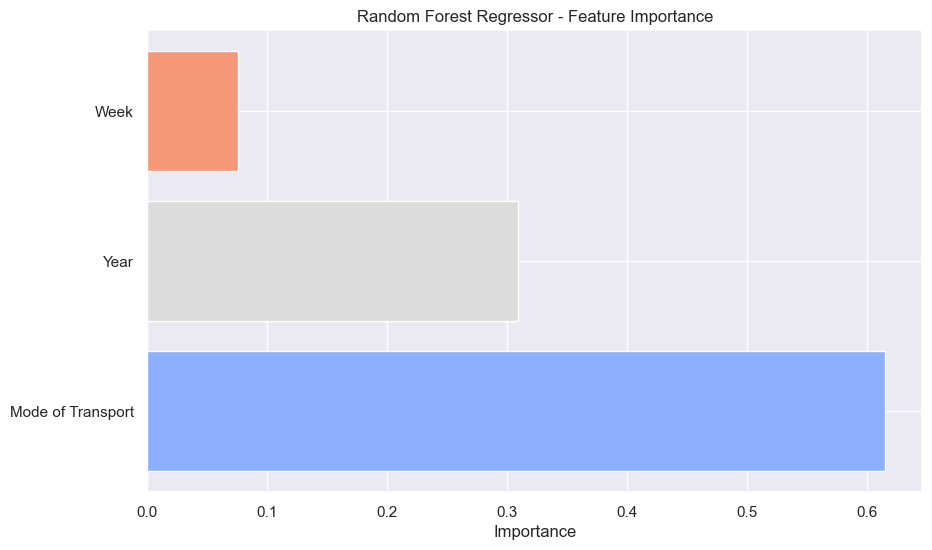

In [39]:
# Fit the model to the entire dataset
rf_model_ireland.fit(X, y)

# Extract feature importances
feature_importance = rf_model_ireland.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a custom color palette
colors_gb = sns.color_palette('coolwarm', n_colors=len(feature_importance_df))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors_gb) 
plt.xlabel('Importance')
plt.title('Random Forest Regressor - Feature Importance')
plt.show()


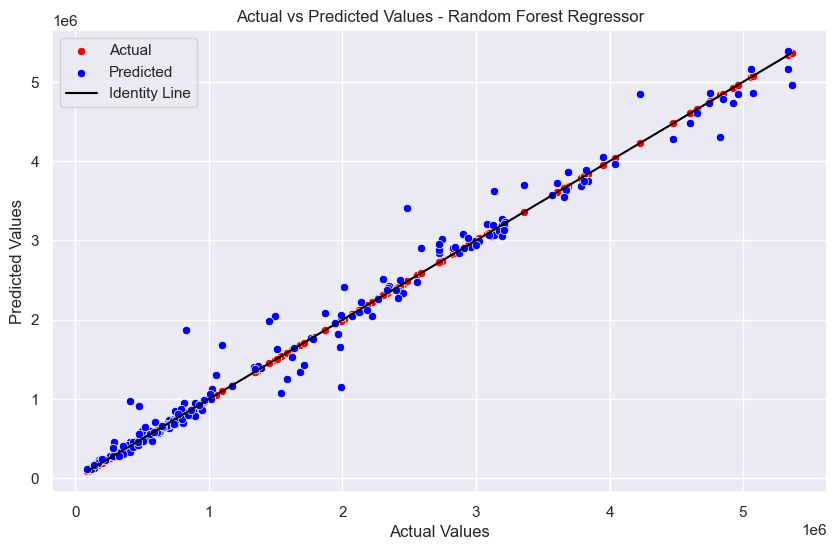

In [40]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf_ireland})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in red
sns.scatterplot(x='Actual', y='Actual', data=results_df, color='red', label='Actual')

# Plot predicted values in blue
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', label='Predicted')

# Add a line representing the identity line
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         linestyle='-', color='black', label='Identity Line')

plt.title('Actual vs Predicted Values - Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


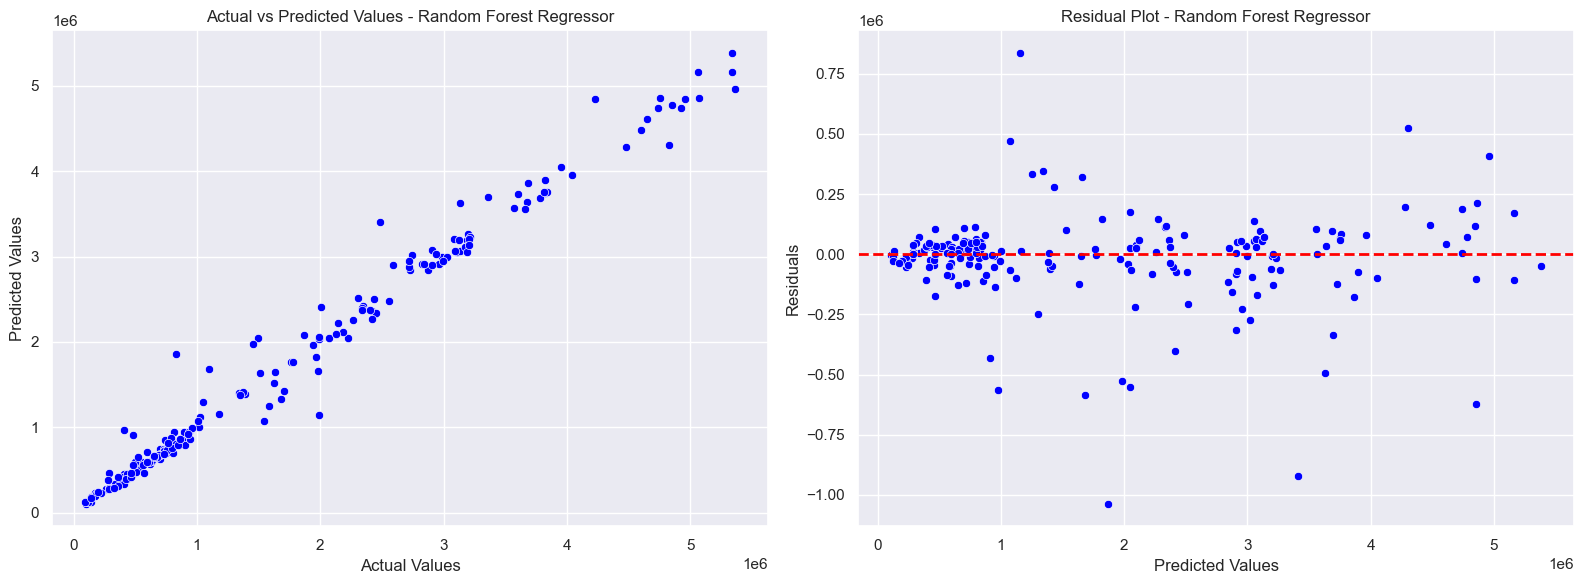

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot and Residual plot in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_rf_ireland, color='blue', ax=axes[0])
axes[0].set_title('Actual vs Predicted Values - Random Forest Regressor')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# Residual plot
sns.scatterplot(x=y_pred_rf_ireland, y=y_test - y_pred_rf_ireland, color='blue', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot - Random Forest Regressor')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Model 2: GradientBoostingRegressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
# Declaring variables
X = passenger_journey_ireland[['Week', 'Mode of Transport', 'Year']]
y = passenger_journey_ireland['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Regressor
gb_regressor_ireland = GradientBoostingRegressor()

# Define the hyperparameters and their possible values for GridSearch
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6]
}

# Create GridSearchCV object
grid_search = GridSearchCV(gb_regressor_ireland , param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the Gradient Boosting Regressor with the best hyperparameters
gb_regressor_best_ireland = GradientBoostingRegressor(learning_rate=best_params['learning_rate'],
                                              n_estimators=best_params['n_estimators'],
                                              max_depth=best_params['max_depth'])

# Fit the model to the training data
gb_regressor_best_ireland.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb_ireland = gb_regressor_best_ireland.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb_ireland)
r2_gb = r2_score(y_test, y_pred_gb_ireland)

print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error (Gradient Boosting Regressor): {mse_gb}')
print(f"R-squared (R2) Score (Gradient Boosting Regressor): {r2_gb}")



Best Parameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200}
Mean Squared Error (Gradient Boosting Regressor): 42350581567.13168
R-squared (R2) Score (Gradient Boosting Regressor): 0.9785470302324506


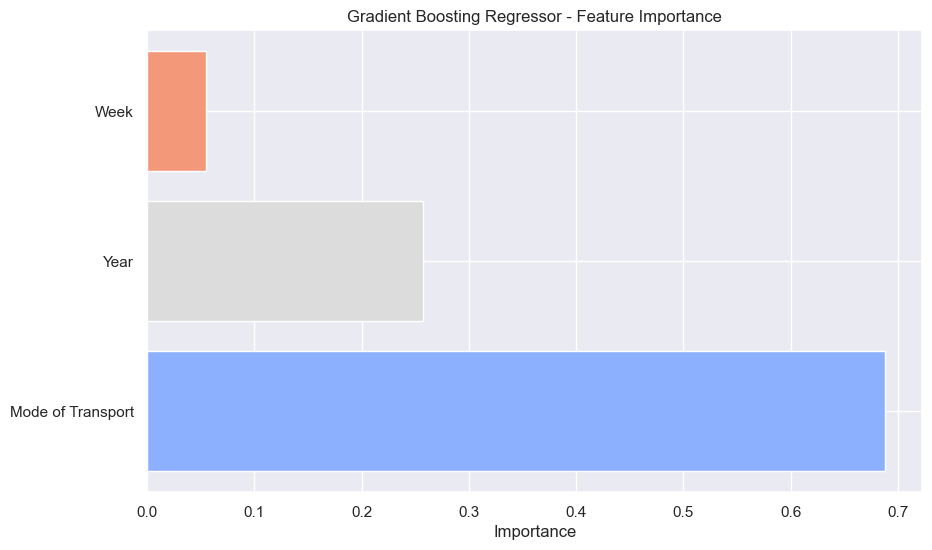

In [44]:
# Initialize the Gradient Boosting Regressor
gb_regressor_ireland  = GradientBoostingRegressor()

# Fit the model to your data
gb_regressor_ireland .fit(X, y)

# Extract feature importances
feature_importance_gb = gb_regressor_ireland .feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb})

# Sort the DataFrame by importance in descending order
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# Create a custom color palette
colors_gb = sns.color_palette('coolwarm', n_colors=len(feature_importance_df_gb))

# Plot feature importances with mixed colors
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_gb['Feature'], feature_importance_df_gb['Importance'], color=colors_gb)

plt.xlabel('Importance')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.show()


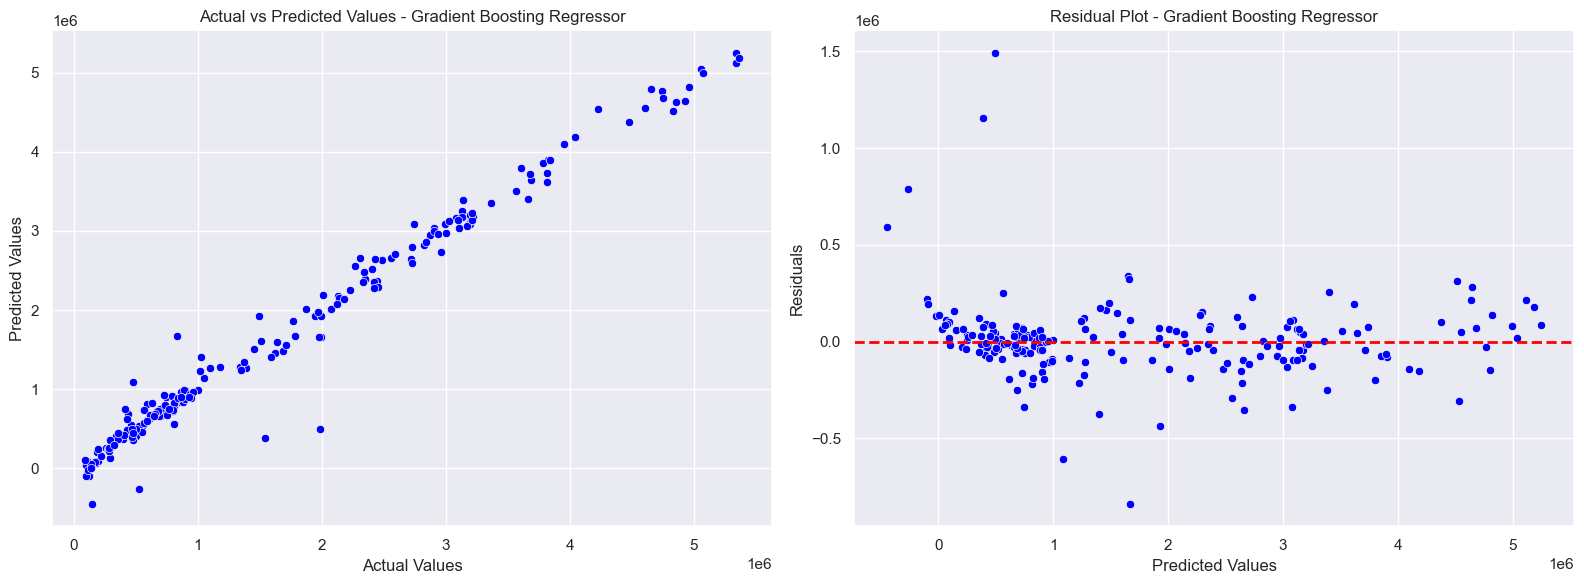

In [45]:
# Scatter plot and Residual plot in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_gb_ireland, color='blue', ax=axes[0])
axes[0].set_title('Actual vs Predicted Values - Gradient Boosting Regressor')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# Residual plot
sns.scatterplot(x=y_pred_gb_ireland, y=y_test - y_pred_gb_ireland, color='blue', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot - Gradient Boosting Regressor')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

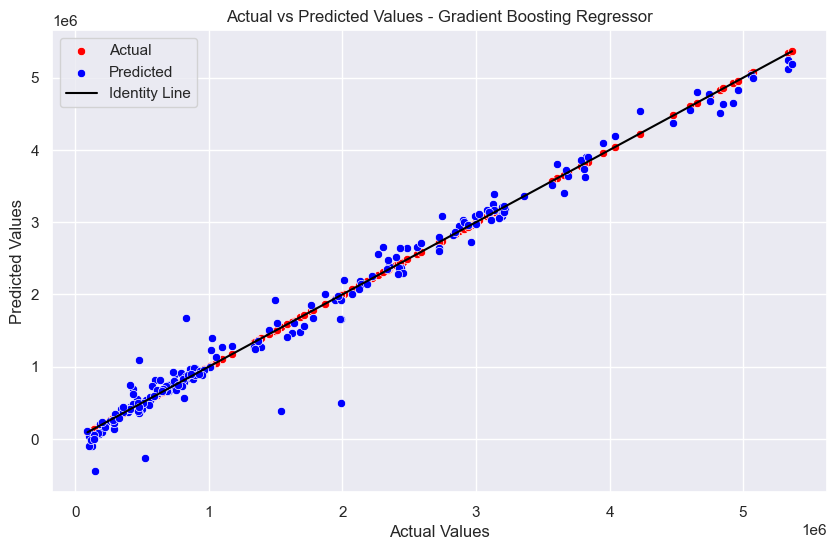

In [46]:
# Create a DataFrame to store actual and predicted values
results_df_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb_ireland})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in red
sns.scatterplot(x='Actual', y='Actual', data=results_df_gb, color='red', label='Actual')

# Plot predicted values in blue
sns.scatterplot(x='Actual', y='Predicted', data=results_df_gb, color='blue', label='Predicted')

# Add a line representing the identity line
plt.plot([results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         [results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         linestyle='-', color='black', label='Identity Line')

plt.title('Actual vs Predicted Values - Gradient Boosting Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Public Transport Journeys by Type of Transport London UK

In [47]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "Value in millions" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Type_of_Transport_london = pd.read_csv("tfl_journeys_type_london.csv" , na_values = missing_value_formats,  dtype={'Value_in_millions': float})

In [48]:
#Checking 5 rows
Type_of_Transport_london.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN


# Exploratory Data Analysis

In [49]:
#Check the 5 first rows of the dataset
Type_of_Transport_london.shape

(177, 12)

In [50]:
#check information general of the dataset
Type_of_Transport_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Period and Financial year      177 non-null    object 
 1   Reporting Period               177 non-null    int64  
 2   Days in period                 177 non-null    int64  
 3   Period beginning               177 non-null    object 
 4   Period ending                  177 non-null    object 
 5   Bus journeys (m)               177 non-null    float64
 6   Underground journeys (m)       177 non-null    float64
 7   DLR Journeys (m)               177 non-null    float64
 8   Tram Journeys (m)              177 non-null    float64
 9   Overground Journeys (m)        170 non-null    float64
 10  London Cable Car Journeys (m)  148 non-null    float64
 11  TfL Rail Journeys (m)          111 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1

In [51]:
#Check descripted variables in dataset
Type_of_Transport_london.describe()

,Reporting Period,Days in period,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,170.000000,148.000000,111.000000
mean,6.887006,28.084746,159.251412,88.789831,7.600000,1.993220,11.365294,0.110135,5.185586
std,3.735381,0.655955,35.217372,24.040373,1.890076,0.460557,3.491889,0.059178,4.074128
min,1.000000,26.000000,30.200000,5.700000,1.200000,0.400000,1.000000,0.000000,0.600000
25%,4.000000,28.000000,145.100000,84.500000,6.500000,1.700000,8.925000,0.100000,3.250000
50%,7.000000,28.000000,173.700000,94.100000,7.700000,2.200000,11.600000,0.100000,3.800000
75%,10.000000,28.000000,182.500000,105.300000,9.200000,2.300000,14.375000,0.100000,4.600000
max,13.000000,31.000000,207.500000,118.200000,10.600000,2.800000,17.800000,0.500000,17.800000


In [52]:
#checking null values, 3 columns identify with missing values
Type_of_Transport_london.isnull().sum()

Period and Financial year         0
Reporting Period                  0
Days in period                    0
Period beginning                  0
Period ending                     0
Bus journeys (m)                  0
Underground journeys (m)          0
DLR Journeys (m)                  0
Tram Journeys (m)                 0
Overground Journeys (m)           7
London Cable Car Journeys (m)    29
TfL Rail Journeys (m)            66
dtype: int64

In [53]:
Type_of_Transport_london.count()

Period and Financial year        177
Reporting Period                 177
Days in period                   177
Period beginning                 177
Period ending                    177
Bus journeys (m)                 177
Underground journeys (m)         177
DLR Journeys (m)                 177
Tram Journeys (m)                177
Overground Journeys (m)          170
London Cable Car Journeys (m)    148
TfL Rail Journeys (m)            111
dtype: int64

In [54]:
#This function will show if there is any rows or colums that containing duplicate data.
# This function will show if there are any rows or columns containing duplicate data.
duplicate_rows_df = Type_of_Transport_london[Type_of_Transport_london.duplicated()]
print("Number of duplicate rows:", duplicate_rows_df.shape[0]) 

Number of duplicate rows: 0


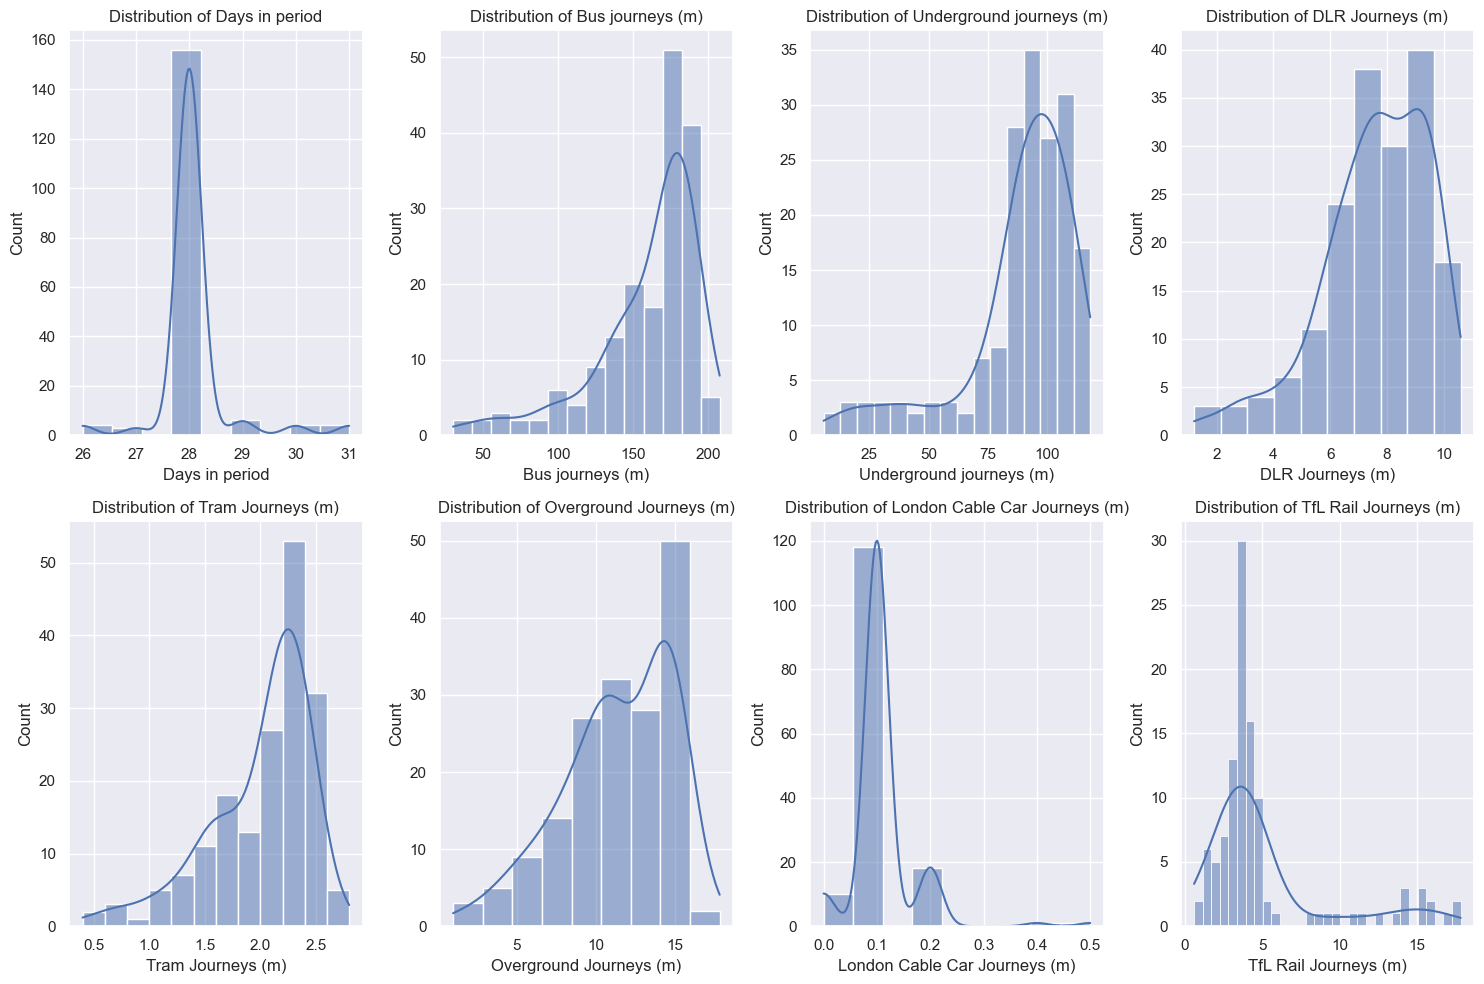

In [55]:
# Select specific columns for distribution plots
selected_columns = [ 'Days in period', 'Bus journeys (m)', 
                     'Underground journeys (m)', 'DLR Journeys (m)',
                     'Tram Journeys (m)', 'Overground Journeys (m)',
                     'London Cable Car Journeys (m)', 'TfL Rail Journeys (m)']
# Set up subplots with two rows
fig, axes = plt.subplots(nrows=2, ncols=len(selected_columns) // 2 , figsize=(15, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Create distribution plots for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(Type_of_Transport_london[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Data Preparation

In [56]:
# Drop 'Statistic Label' and 'UNIT' columns from dataset
Type_of_Transport_london = Type_of_Transport_london.drop(['Period and Financial year'], axis=1)

# Convert 'Period beginning' and 'Period ending' columns to datetime
Type_of_Transport_london['Period beginning'] = pd.to_datetime(Type_of_Transport_london['Period beginning'])
Type_of_Transport_london['Period ending'] = pd.to_datetime(Type_of_Transport_london['Period ending'])

# Extract the year and create a new column
Type_of_Transport_london['Year'] = Type_of_Transport_london['Period ending'].dt.year
Type_of_Transport_london['Year'] = Type_of_Transport_london['Year'].astype(str).str[:4]

# Select data only for the years 2019, 2020, 2021, 2022, and 2023
selected_years = [2019, 2020, 2021, 2022, 2023]
Type_of_Transport_london = Type_of_Transport_london[
    (Type_of_Transport_london['Period beginning'].dt.year.isin(selected_years)) |
    (Type_of_Transport_london['Period ending'].dt.year.isin(selected_years))
]

# Print the filtered DataFrame
Type_of_Transport_london.head()

,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),Year
113,10,28,2018-12-09,2019-01-05,144.9,91.9,7.5,1.9,11.6,0.1,3.9,2019
114,11,28,2019-01-06,2019-02-02,171.3,106.7,9.3,2.2,14.5,0.1,4.6,2019
115,12,28,2019-02-03,2019-03-02,171.3,110.8,9.7,2.2,14.4,0.1,4.4,2019
116,13,29,2019-03-03,2019-03-31,182.7,114.1,10.0,2.2,15.7,0.1,4.3,2019
117,1,28,2019-04-01,2019-04-27,156.6,101.2,8.9,2.0,13.9,0.1,4.3,2019


In [57]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Display the current working directory
current_directory

'C:\\Users\\wenyp\\OneDrive\\Documentos\\GitHub\\CA2_2023'

In [58]:
# Using melt function to re-order the dataframe
Type_of_Transport_london_melt = Type_of_Transport_london.melt(
    id_vars=["Year", "Reporting Period", "Days in period", "Period beginning", "Period ending"],
    var_name="Mode of Transport",
    value_name="Value_in_millions"
)


Type_of_Transport_london_melt.head


<bound method NDFrame.head of      Year  Reporting Period  Days in period Period beginning Period ending  \
0    2019                10              28       2018-12-09    2019-01-05   
1    2019                11              28       2019-01-06    2019-02-02   
2    2019                12              28       2019-02-03    2019-03-02   
3    2019                13              29       2019-03-03    2019-03-31   
4    2019                 1              28       2019-04-01    2019-04-27   
..    ...               ...             ...              ...           ...   
443  2023                 4              28       2023-06-25    2023-07-22   
444  2023                 5              28       2023-07-23    2023-08-19   
445  2023                 6              28       2023-08-20    2023-09-16   
446  2023                 7              28       2023-09-17    2023-10-14   
447  2023                 8              28       2023-10-15    2023-11-11   

         Mode of Transport  Value

In [59]:
#checking new shape of the dataframe
Type_of_Transport_london_melt.shape

(448, 7)

## Handling Missing values and cleaning data 

Text(0.5, 1.0, 'Feature Statistics')

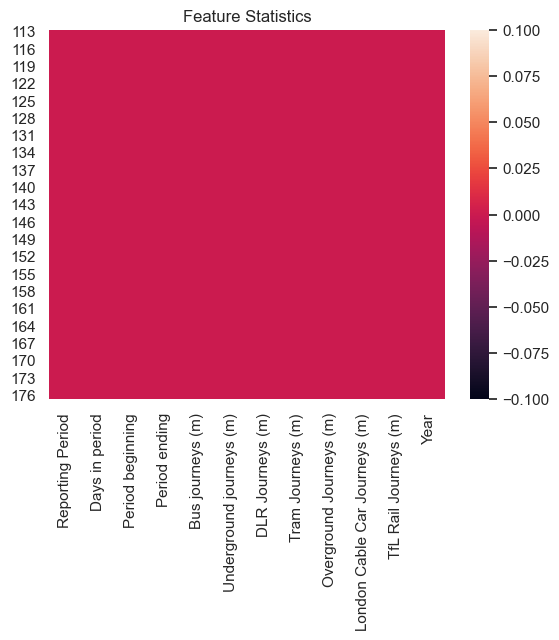

In [60]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe no columns with missing values = VALUE 
sns.heatmap(Type_of_Transport_london.isnull())
plt.title("Feature Statistics")

In [61]:
#Checking null values
Type_of_Transport_london.isnull().sum()

Reporting Period                 0
Days in period                   0
Period beginning                 0
Period ending                    0
Bus journeys (m)                 0
Underground journeys (m)         0
DLR Journeys (m)                 0
Tram Journeys (m)                0
Overground Journeys (m)          0
London Cable Car Journeys (m)    0
TfL Rail Journeys (m)            0
Year                             0
dtype: int64

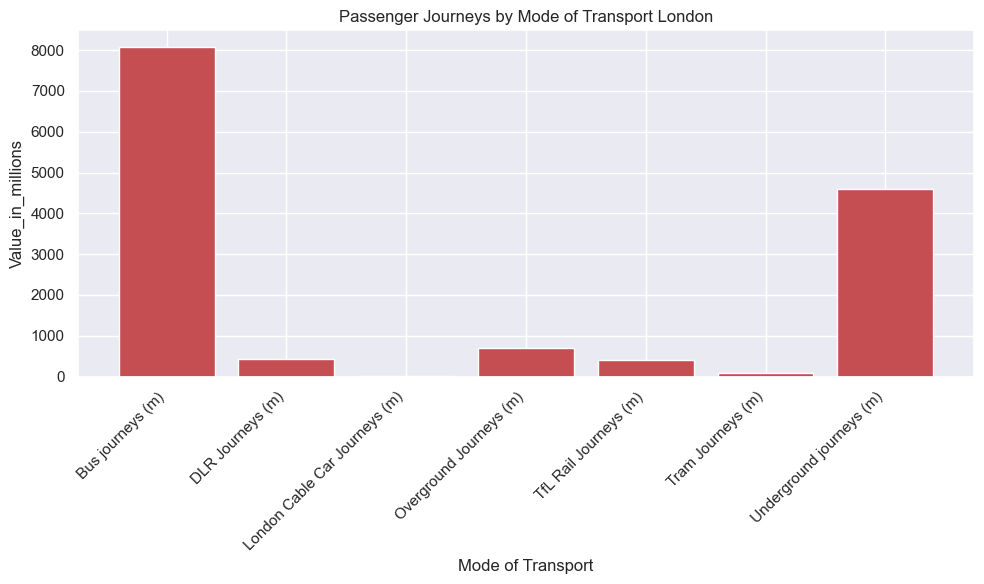

In [62]:
def passenger_journeys_london_plot(data):
    # Group by 'Mode of Transport' and calculate the sum of 'VALUE' for each group
    number_passenger_group_london = data.groupby('Mode of Transport')['Value_in_millions'].sum().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(number_passenger_group_london['Mode of Transport'], number_passenger_group_london['Value_in_millions'], color='r')
    plt.xlabel('Mode of Transport')
    plt.ylabel('Value_in_millions')
    plt.title('Passenger Journeys by Mode of Transport London')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function with your dataset
passenger_journeys_london_plot(Type_of_Transport_london_melt)

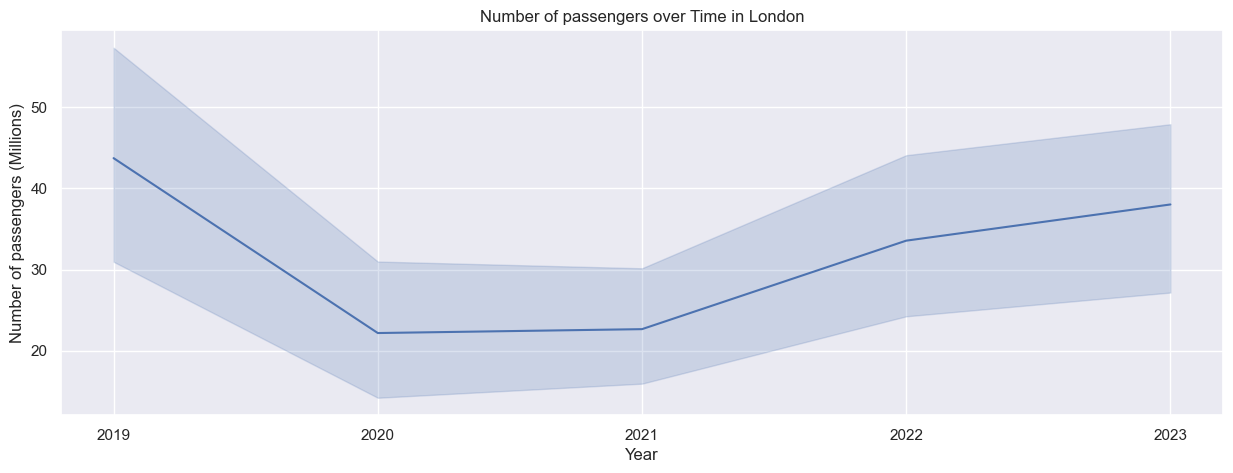

In [63]:
def passengers_over_time_london_plot(data):
    # Plotting a line plot to visualise the number of passenger (values) over the year
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=data, x="Year", y="Value_in_millions", color="b")
    plt.title("Number of passengers over Time in London")
    plt.xlabel("Year")
    plt.ylabel("Number of passengers (Millions)")
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the function with your dataset
passengers_over_time_london_plot(Type_of_Transport_london_melt)

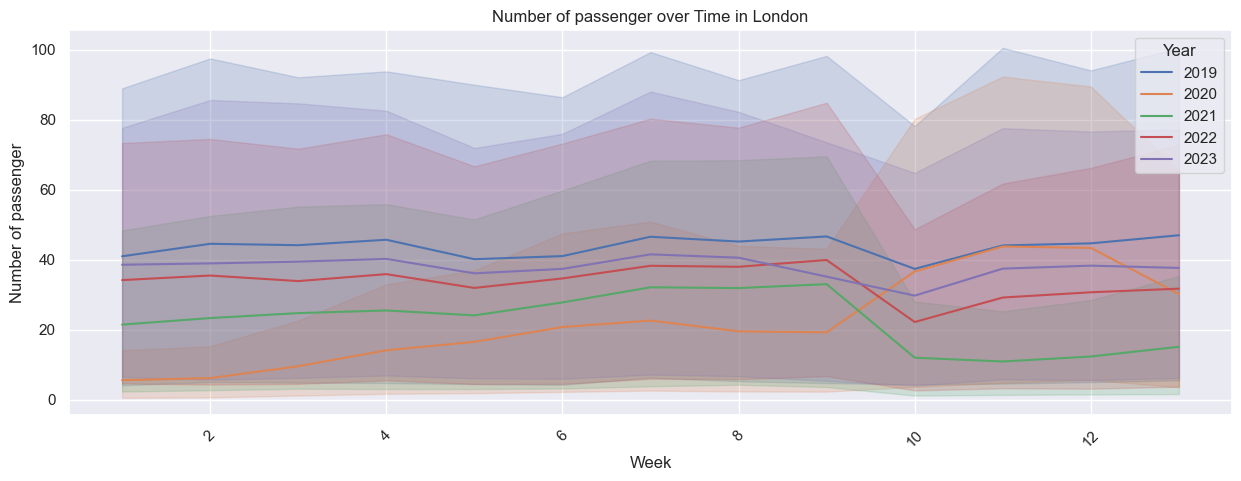

In [64]:
def passenger_number_over_time_london(Type_of_Transport_london_melt):
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=Type_of_Transport_london_melt, x="Reporting Period", y="Value_in_millions", hue="Year")

    plt.title("Number of passenger over Time in London")
    plt.xlabel("Week")
    plt.ylabel("Number of passenger")
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# Call the function with your dataset
passenger_number_over_time_london(Type_of_Transport_london_melt)

# Outliers

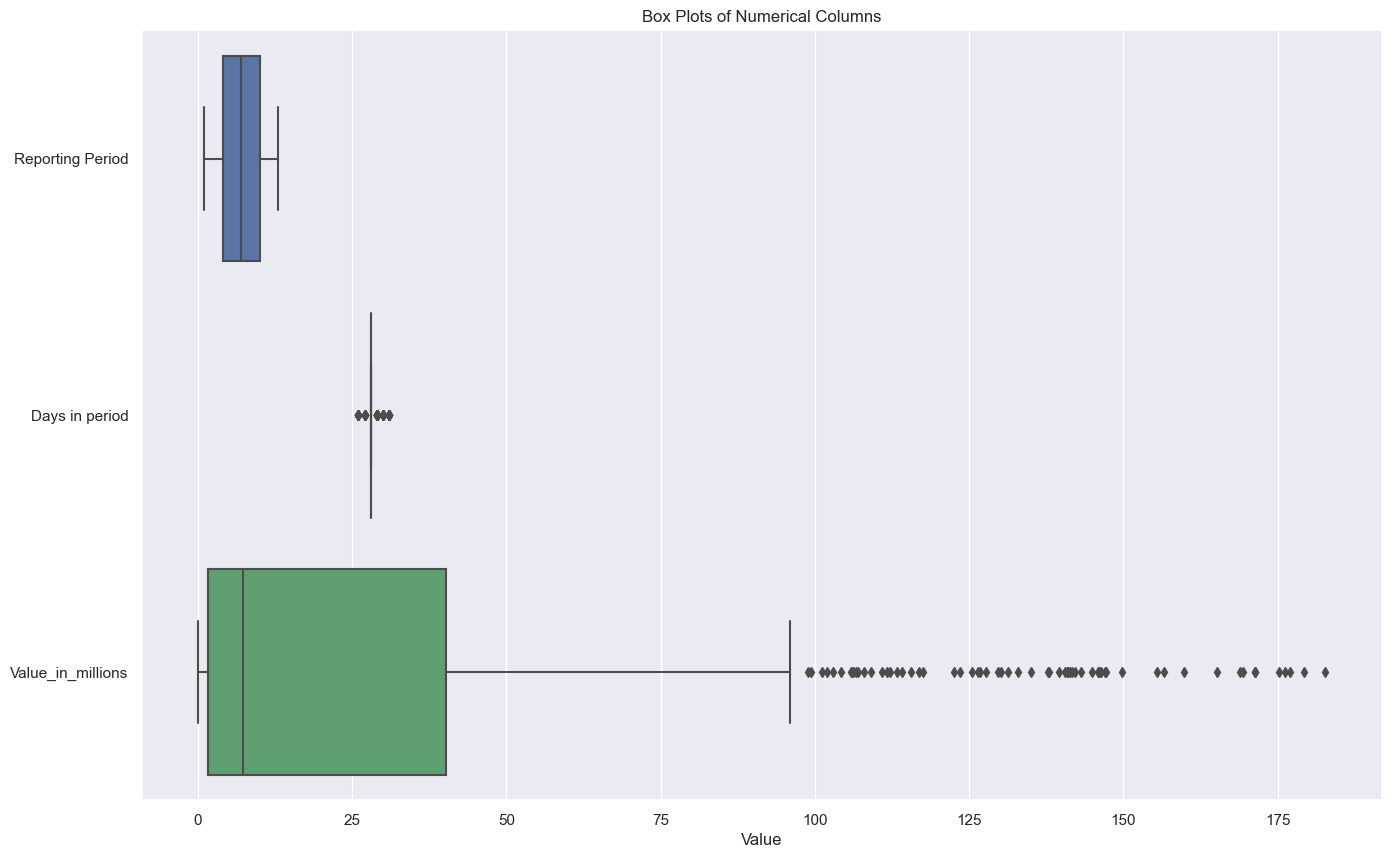

In [65]:
# Select only numerical columns from the DataFrame
numerical_columns = Type_of_Transport_london_melt.select_dtypes(include='number')

# Create box plots for each numerical column
plt.figure(figsize=(16, 10))
sns.boxplot(data=numerical_columns, orient='h')
plt.title('Box Plots of Numerical Columns')
plt.xlabel('Value')
plt.show()

# Encoding Categorical Variables

In [66]:
Data_num = Type_of_Transport_london_melt[['Year','Reporting Period','Days in period', 'Period beginning' , 'Period ending','Value_in_millions']]
Data_num

,Year,Reporting Period,Days in period,Period beginning,Period ending,Value_in_millions
0,2019,10,28,2018-12-09,2019-01-05,144.9
1,2019,11,28,2019-01-06,2019-02-02,171.3
2,2019,12,28,2019-02-03,2019-03-02,171.3
3,2019,13,29,2019-03-03,2019-03-31,182.7
4,2019,1,28,2019-04-01,2019-04-27,156.6
...,...,...,...,...,...,...
443,2023,4,28,2023-06-25,2023-07-22,16.7
444,2023,5,28,2023-07-23,2023-08-19,15.4
445,2023,6,28,2023-08-20,2023-09-16,15.6
446,2023,7,28,2023-09-17,2023-10-14,17.3


In [67]:
le = LabelEncoder()
Type_of_Transport_london_melt['Mode of Transport'] = le.fit_transform(Type_of_Transport_london_melt['Mode of Transport'])

In [68]:
#create new dataframe to merge new encoding dataframes
Type_of_Transport_london_melt = pd.merge(Type_of_Transport_london_melt['Mode of Transport'], Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))

# Specify the folder path
folder_path = 'C:\\Users\\wenyp\\OneDrive\\Documentos\\GitHub\\CA2_2023'

# Export the DataFrame to a CSV file in the specified folder
Type_of_Transport_london_melt.to_csv(f'{folder_path}\\Type_of_Transport_london_melt.csv', index=False)

Type_of_Transport_london_melt.head()

,Mode of Transport,Year,Reporting Period,Days in period,Period beginning,Period ending,Value_in_millions
0,0,2019,10,28,2018-12-09,2019-01-05,144.9
1,0,2019,11,28,2019-01-06,2019-02-02,171.3
2,0,2019,12,28,2019-02-03,2019-03-02,171.3
3,0,2019,13,29,2019-03-03,2019-03-31,182.7
4,0,2019,1,28,2019-04-01,2019-04-27,156.6


# Supervised Modelling 

In [69]:
# Select features and target variable
X = Type_of_Transport_london_melt[['Mode of Transport','Year','Reporting Period','Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineal Regression model
linear_regressor = LinearRegression()
lasso_regressor = Lasso(alpha=0.1)
ridge_regressor = Ridge(alpha=1.0)

# Non-lineal Regression model
rf_regressor = RandomForestRegressor(random_state=42)
svr_regressor = SVR()
knn_regressor = KNeighborsRegressor()
gb_regressor = GradientBoostingRegressor()

Lineal_Regression_models = [linear_regressor, lasso_regressor, ridge_regressor]
Non_Lineal_Regression_models = [rf_regressor, svr_regressor, knn_regressor, gb_regressor]

# Lineal Regression models
for model in Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Linear Regression Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f"R-squared (R2) Score: {r2}")
    print('\n')

# Non-Lineal Regression models
for model in Non_Lineal_Regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Non-Linear Regression Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f"R-squared (R2) Score: {r2}")
    print('\n')


Linear Regression Model: LinearRegression
Mean Squared Error: 2690.013697984456
R-squared (R2) Score: -0.005086570760893805


Linear Regression Model: Lasso
Mean Squared Error: 2686.6531204163584
R-squared (R2) Score: -0.003830937235225873


Linear Regression Model: Ridge
Mean Squared Error: 2689.9105498223325
R-squared (R2) Score: -0.005048030870696607


Non-Linear Regression Model: RandomForestRegressor
Mean Squared Error: 259.5659528000003
R-squared (R2) Score: 0.9030167565386339


Non-Linear Regression Model: SVR
Mean Squared Error: 3769.8086996146185
R-squared (R2) Score: -0.40853710193342496


Non-Linear Regression Model: KNeighborsRegressor
Mean Squared Error: 1173.519991111111
R-squared (R2) Score: 0.5615304173101513


Non-Linear Regression Model: GradientBoostingRegressor
Mean Squared Error: 233.9473459792306
R-squared (R2) Score: 0.9125887961518343




In [70]:
models = [linear_regressor, lasso_regressor, ridge_regressor, rf_regressor, svr_regressor, knn_regressor, gb_regressor]

# Initialize variables to store the top three models
top_models_mse = [(None, float('inf'))] * 3  # List of (model, mse)
top_models_r2 = [(None, -float('inf'))] * 3  # List of (model, r2)

# Iterate through models and evaluate
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Update top models based on MSE
    top_models_mse.append((model, mse))
    top_models_mse.sort(key=lambda x: x[1])  # Sort by MSE and keep top 3
    top_models_mse = top_models_mse[:2]

    # Update top models based on R2 score
    top_models_r2.append((model, r2))
    top_models_r2.sort(key=lambda x: x[1], reverse=True)  # Sort by R2 score and keep top 3
    top_models_r2 = top_models_r2[:2]

# Print the top three models based on MSE
print('\nTop 2 Best Models based on Mean Squared Error:')
for i, (model, mse) in enumerate(top_models_mse, 1):
    print(f'{i}. Model: {type(model).__name__}, MSE: {mse}')

# Print the top three models based on R2 score
print('\nTop 2 Best Models based on R-squared (R2) Score:')
for i, (model, r2) in enumerate(top_models_r2, 1):
    print(f'{i}. Model: {type(model).__name__}, R2 Score: {r2}')


Top 2 Best Models based on Mean Squared Error:
1. Model: GradientBoostingRegressor, MSE: 234.52847814515715
2. Model: RandomForestRegressor, MSE: 259.5659528000003

Top 2 Best Models based on R-squared (R2) Score:
1. Model: GradientBoostingRegressor, R2 Score: 0.9123716641215225
2. Model: RandomForestRegressor, R2 Score: 0.9030167565386339


## Model 1: Random Forest Regressor

Generation Random forest regression model and selecting hyperparameters using GridSearchCV 

In [71]:
# Select features and target variable
X = Type_of_Transport_london_melt[['Mode of Transport','Year','Reporting Period','Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model_uk = RandomForestRegressor(random_state=42)#, max_depth= 10, min_samples_leaf = 1, n_estimators= 200)

# Fit the model to the training data
rf_model_uk.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_uk = rf_model_uk.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf_uk)
r2_rf = r2_score(y_test, y_pred_rf_uk)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]

}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_model_uk, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Random Forest Regressor with the best hyperparameters
best_rf_model_uk = RandomForestRegressor(**best_params)

# Fit the model to the training data
best_rf_model_uk.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_uk = best_rf_model_uk.predict(X_test)

# Evaluate the model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_uk)
r2_rf_best = r2_score(y_test, y_pred_rf_uk)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (Random Forest - Best): {mse_rf_best}')
print(f"R-squared (R2) Score (Random Forest - Best): {r2_rf_best}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Mean Squared Error (Random Forest - Best): 271.764182229372
R-squared (R2) Score (Random Forest - Best): 0.898459056109187


### Features importance

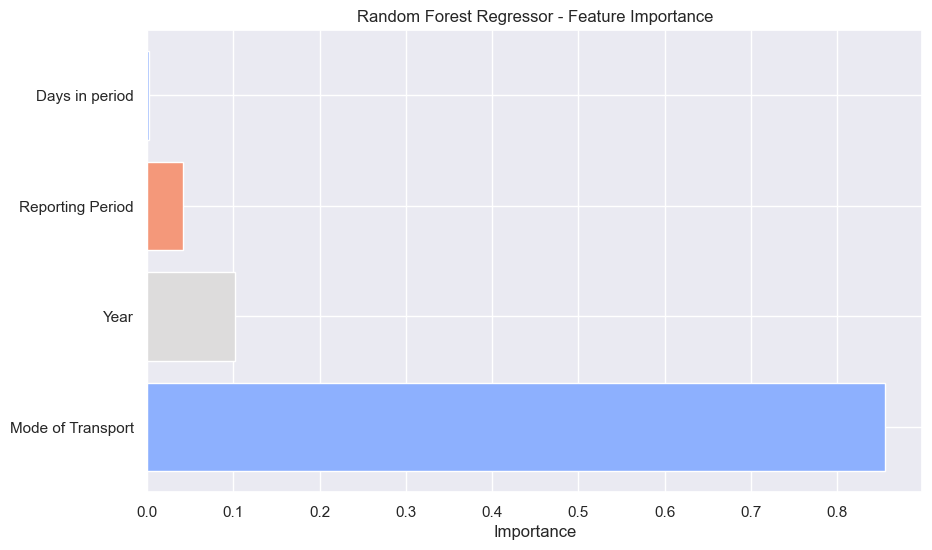

In [72]:
# Fit the model to the entire dataset
rf_model_uk.fit(X, y)

# Extract feature importances
feature_importance = rf_model_uk.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a custom color palette
colors_gb = sns.color_palette('coolwarm', n_colors=len(feature_importance_df_gb))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors_gb) 
plt.xlabel('Importance')
plt.title('Random Forest Regressor - Feature Importance')
plt.show()


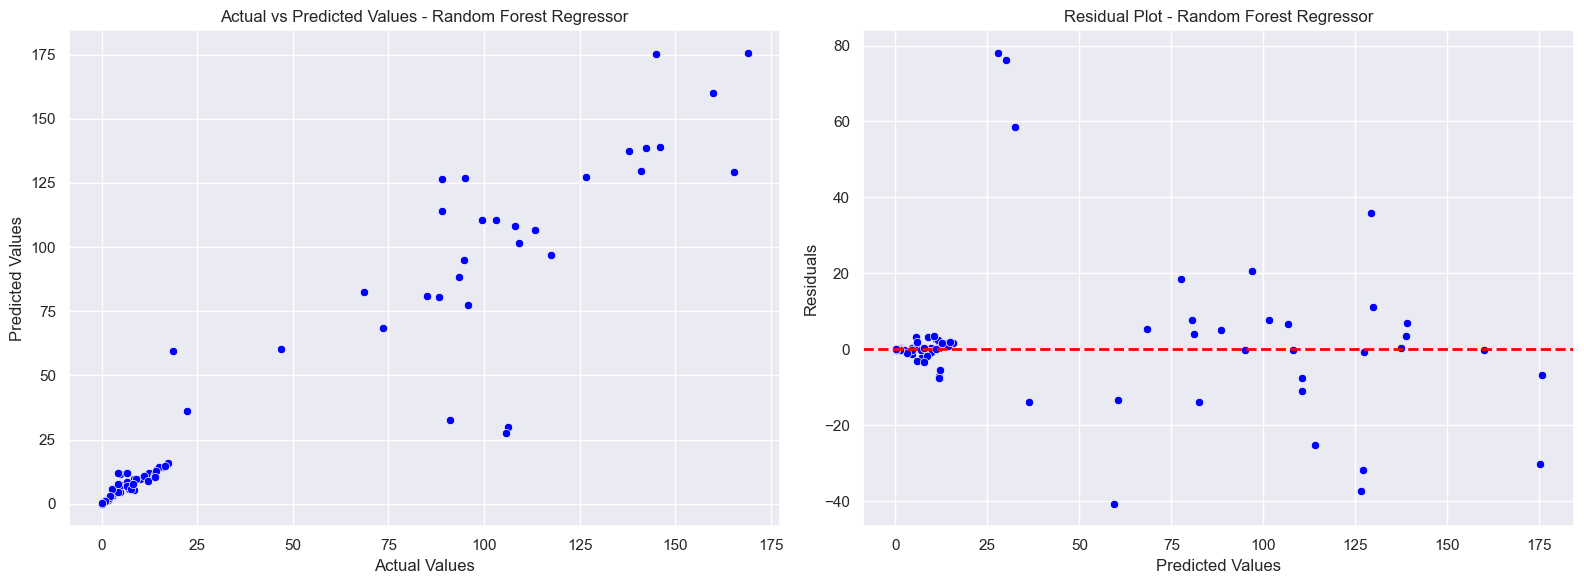

In [73]:
# Scatter plot and Residual plot in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_rf_uk, color='blue', ax=axes[0])
axes[0].set_title('Actual vs Predicted Values - Random Forest Regressor')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# Residual plot
sns.scatterplot(x=y_pred_rf_uk, y=y_test - y_pred_rf_uk, color='blue', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot - Random Forest Regressor')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

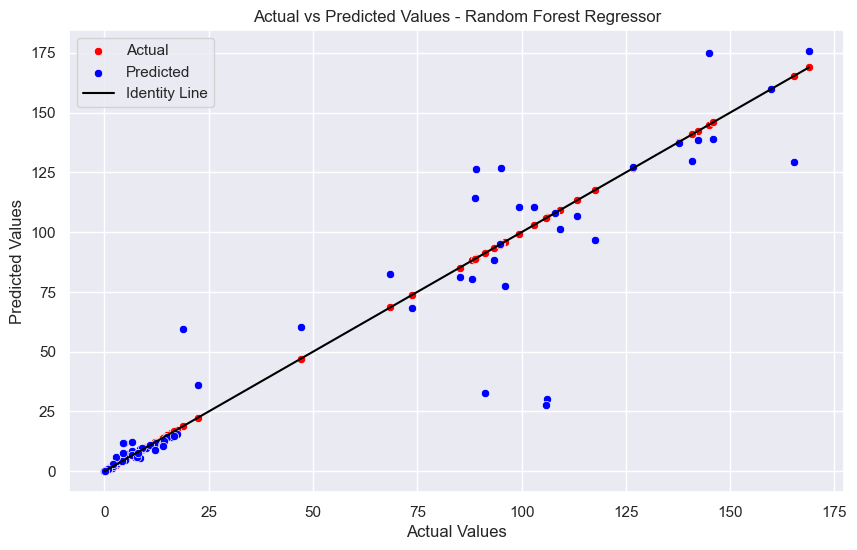

In [74]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf_uk})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in red
sns.scatterplot(x='Actual', y='Actual', data=results_df, color='red', label='Actual')

# Plot predicted values in blue
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', label='Predicted')

# Add a line representing the identity line
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         linestyle='-', color='black', label='Identity Line')

plt.title('Actual vs Predicted Values - Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


## Model 2: Gradient Boosting Regressor

In [75]:
# Declaring variables
X = Type_of_Transport_london_melt[['Mode of Transport','Year','Reporting Period','Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor_uk = GradientBoostingRegressor(learning_rate=0.5, max_depth= 4, n_estimators= 200)

# Define the hyperparameters and their possible values for GridSearch
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor_uk, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Gradient Boosting Regressor with the best hyperparameters
best_gb_regressor_uk = GradientBoostingRegressor(**best_params)

# Fit the model to the training data
best_gb_regressor_uk.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb_best_uk = best_gb_regressor_uk.predict(X_test)

# Evaluate the model
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best_uk)
r2_gb_best = r2_score(y_test, y_pred_gb_best_uk)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (Gradient Boosting - Best): {mse_gb_best}')
print(f"R-squared (R2) Score (Gradient Boosting - Best): {r2_gb_best}")

Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error (Gradient Boosting - Best): 260.8629650351192
R-squared (R2) Score (Gradient Boosting - Best): 0.9025321457797343


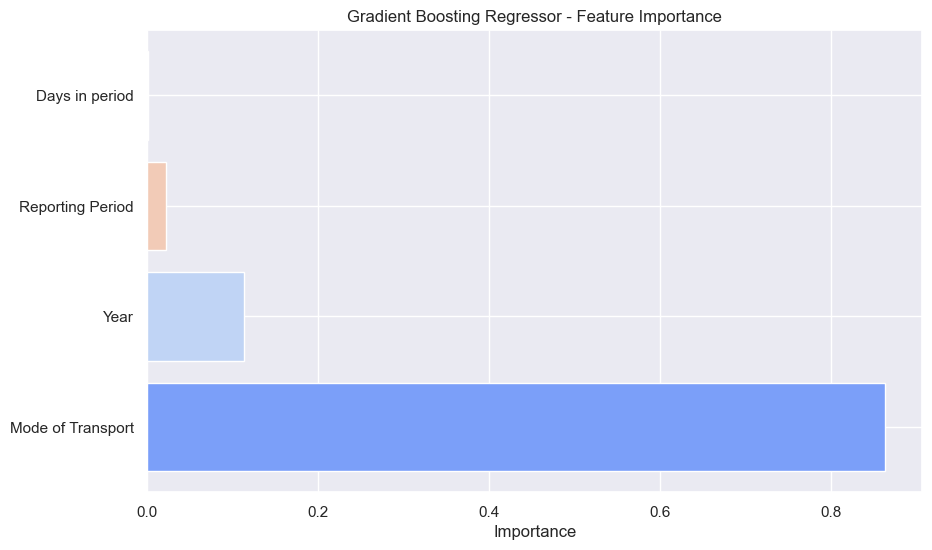

In [76]:
# Select features and target variable
X = Type_of_Transport_london_melt[['Mode of Transport','Year','Reporting Period','Days in period']]
y = Type_of_Transport_london_melt['Value_in_millions']

# Fit the model to your data
gb_regressor_uk.fit(X, y)

# Extract feature importances
feature_importance_gb = gb_regressor_uk.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb})

# Sort the DataFrame by importance in descending order
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# Create a custom color palette
colors_gb = sns.color_palette('coolwarm', n_colors=len(feature_importance_df_gb))

# Plot feature importances with mixed colors
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_gb['Feature'], feature_importance_df_gb['Importance'], color=colors_gb)

plt.xlabel('Importance')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.show()

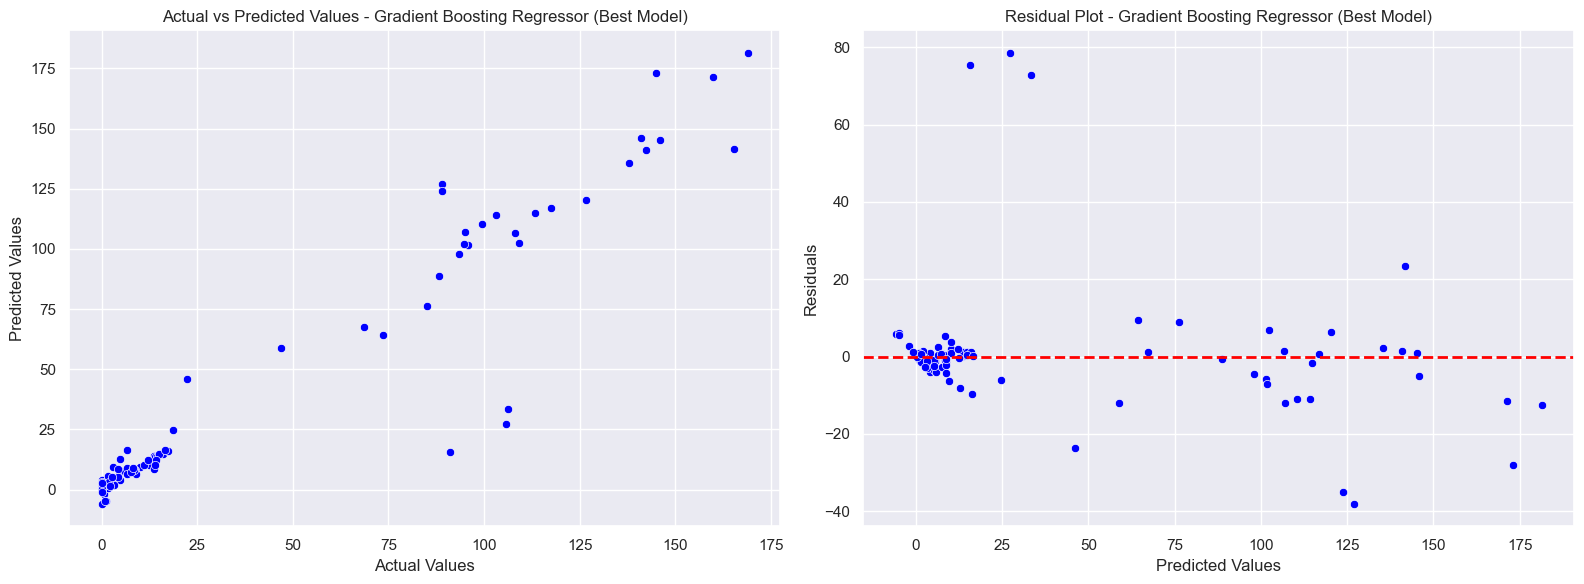

In [77]:
# Scatter plot and Residual plot in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred_gb_best_uk, color='blue', ax=axes[0])
axes[0].set_title('Actual vs Predicted Values - Gradient Boosting Regressor (Best Model)')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# Residual plot
sns.scatterplot(x=y_pred_gb_best_uk, y=y_test - y_pred_gb_best_uk, color='blue', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot - Gradient Boosting Regressor (Best Model)')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

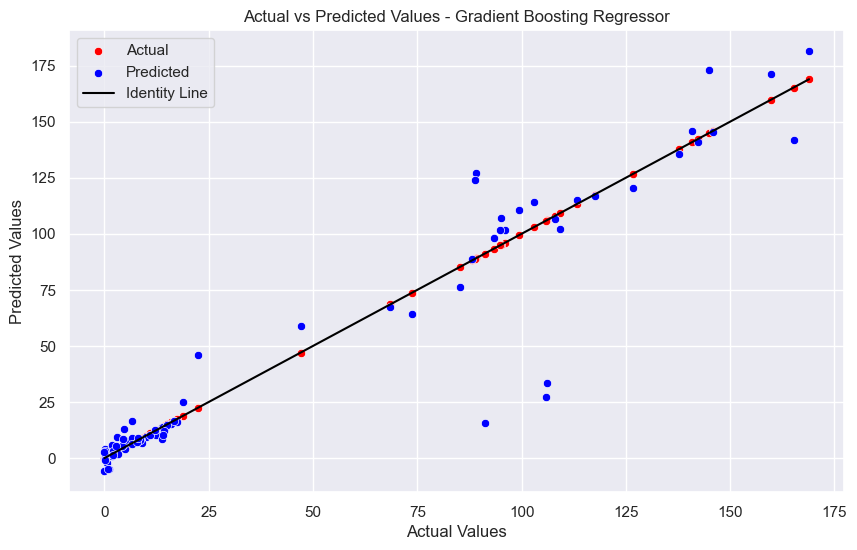

In [78]:
# Create a DataFrame to store actual and predicted values
results_df_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb_best_uk})

# Scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in red
sns.scatterplot(x='Actual', y='Actual', data=results_df_gb, color='red', label='Actual')

# Plot predicted values in blue
sns.scatterplot(x='Actual', y='Predicted', data=results_df_gb, color='blue', label='Predicted')

# Add a line representing the identity line
plt.plot([results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         [results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         linestyle='-', color='black', label='Identity Line')

plt.title('Actual vs Predicted Values - Gradient Boosting Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Sentimental Analyst

In [79]:
import pandas as pd
from textblob import TextBlob

In [80]:
bike_survey_london= pd.read_csv("assembly-bike-survey-data_london.csv")
bike_survey_london.head(5)

,RespondentID,Q1-Location,Q2-Age,Q3-Gender,Q4-BikeOwner,Q5-StartedCycling,Q6-WhenStarted,Q8-SuperhighwayUsed,Q9-SuperhighwayFrequency,Q10-Width,...,Q19-Frequency,Q20-Reason,Q20-ReasonOther,Q21-Duration,Q22-SupportCentre,Q23-Problem,Q24-SupportExperience,Q25-SupportComments,Q26-Improvements,Q27-Reason
0,1203127707,Kent,30-39,Male,Yes,"No, I already cycled",1 year,"Superhighway 7, Merton to the City via A24-A3",Only tried it once,fair,...,Once a fortnight,A combination of the above,"Tube, walking, bus and train.",Less than 30 mins,No,NaN,NaN,NaN,There should be the provision to be able to hi...,NaN
1,1202170092,Camden,40-49,Male,No,"Yes, because of the Cycle Hire Scheme",NaN,NaN,NaN,NaN,...,Several times a week,A combination of the above,NaN,Less than 30 mins,No,NaN,NaN,NaN,The docking point opposite the Black Cats fact...,NaN
2,1200588266,Richmond,18-29,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,Once a fortnight,A combination of the above,Instead of tube/walk/bus,Less than 30 mins,No,NaN,NaN,NaN,NaN,NaN
3,1200133603,NaN,40-49,Male,No,"Yes, because of the Cycle Hire Scheme",Longer,"Superhighway 7, Merton to the City via A24-A3",Once a week,good,...,Several times a week,A combination of the above,"Bus, tube, train and walking",Less than 30 mins,Yes,The wrong fob key was sent out. It did not co...,Very good,General comments: I love the scheme. Please ...,The bikes could have more reflectors on them. ...,NaN
4,1199557604,Sutton,30-39,Male,Yes,"No, I already cycled",Longer,"Superhighway 7, Merton to the City via A24-A3",Occasionally,very good,...,Several times a week,A combination of the above,"Instead of walking, bus or tube",Less than 30 mins,No,NaN,NaN,NaN,Just need many more stations to be left as spa...,NaN


### Sentimental analyst using text blob and polarity

In [81]:
# Drop rows with missing values in the text column
bike_survey_london= bike_survey_london.dropna(subset=['Q25-SupportComments'])

In [82]:
# Create a function to get the sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply the function to your text column
bike_survey_london['Sentiment_Polarity'] = bike_survey_london['Q25-SupportComments'].apply(get_sentiment)
bike_survey_london['Sentiment_Polarity'] 

3       0.293750
7       0.100000
12      0.700000
13      0.116667
30      0.433333
          ...   
1282   -0.077778
1284    0.083333
1285   -0.050000
1288    0.073611
1291   -0.095000
Name: Sentiment_Polarity, Length: 314, dtype: float64

In [83]:
bike_survey_london['Sentiment_Category'] = pd.cut(bike_survey_london['Sentiment_Polarity'], bins=3, labels=['Negative', 'Neutral', 'Positive'])
bike_survey_london.head()

,RespondentID,Q1-Location,Q2-Age,Q3-Gender,Q4-BikeOwner,Q5-StartedCycling,Q6-WhenStarted,Q8-SuperhighwayUsed,Q9-SuperhighwayFrequency,Q10-Width,...,Q20-ReasonOther,Q21-Duration,Q22-SupportCentre,Q23-Problem,Q24-SupportExperience,Q25-SupportComments,Q26-Improvements,Q27-Reason,Sentiment_Polarity,Sentiment_Category
3,1200133603,NaN,40-49,Male,No,"Yes, because of the Cycle Hire Scheme",Longer,"Superhighway 7, Merton to the City via A24-A3",Once a week,good,...,"Bus, tube, train and walking",Less than 30 mins,Yes,The wrong fob key was sent out. It did not co...,Very good,General comments: I love the scheme. Please ...,The bikes could have more reflectors on them. ...,NaN,0.293750,Neutral
7,1198050062,Merton,40-49,Male,Yes,"No, I already cycled",Longer,"Superhighway 7, Merton to the City via A24-A3",Only tried it once,good,...,NaN,Less than 30 mins,Yes,Was incorrectly billed for several hours of bi...,Poor,I was told that the incorrect fee would be tak...,NaN,NaN,0.100000,Neutral
12,1197323125,Richmond upon Thames,40-49,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,"Tube, taxis, walking.",Less than 30 mins,Yes,Billing mostly. I'm one of the people affected...,Good,Support has been good. The shame is that I hav...,I want to be able to have more than one key on...,NaN,0.700000,Positive
13,1196772000,Camden,40-49,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,"bus, tube, walk, train. Combination!",Less than 30 mins,Yes,Bike wouldn't release at the station I was using.,Very poor,Had to queue for literally over an hour. Assis...,"Distribution, distribution, distribution! Also...",NaN,0.116667,Neutral
30,1195777047,tower hamlets,18-29,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,"instead of tube/bus, instead of walking, inste...",Less than 30 mins,Yes,"auto top up had not been activated once, the s...",Very good,"very quick to talk to me, very quick to sort o...",the cycle map on the barclays bikes website's ...,NaN,0.433333,Positive


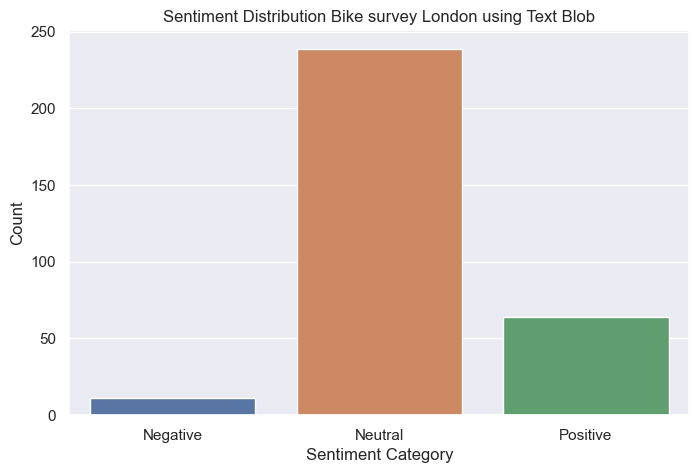

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts = bike_survey_london['Sentiment_Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution Bike survey London using Text Blob')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

### Sentiment analysis using VADER (Valence Aware Dictionary and Sentiment Reasoner)

In [85]:
#pip install vaderSentiment

In [86]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [87]:
bike_survey_london= pd.read_csv("assembly-bike-survey-data_london.csv")

In [88]:
# Drop rows with missing values in the text column
bike_survey_london= bike_survey_london.dropna(subset=['Q25-SupportComments'])
bike_survey_london["Q25-SupportComments"].head(10)

3     General comments:  I love the scheme.  Please ...
7     I was told that the incorrect fee would be tak...
12    Support has been good. The shame is that I hav...
13    Had to queue for literally over an hour. Assis...
30    very quick to talk to me, very quick to sort o...
36    Call centre was busy, they took my name and nu...
41    I needed 3 separate calls to resolve my regist...
57             I have never been able to get a response
60    Nice people but unable to solve any real problems
61    Quite a delay, then not answered by someone wi...
Name: Q25-SupportComments, dtype: object

In [89]:
# Create a function to get the compound sentiment score using VADER
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    compound_score = analyzer.polarity_scores(str(text))['compound']
    return compound_score

# Apply the function to your text column
bike_survey_london['VADER_Sentiment_Score'] = bike_survey_london['Q25-SupportComments'].apply(get_vader_sentiment)
bike_survey_london.head()

,RespondentID,Q1-Location,Q2-Age,Q3-Gender,Q4-BikeOwner,Q5-StartedCycling,Q6-WhenStarted,Q8-SuperhighwayUsed,Q9-SuperhighwayFrequency,Q10-Width,...,Q20-Reason,Q20-ReasonOther,Q21-Duration,Q22-SupportCentre,Q23-Problem,Q24-SupportExperience,Q25-SupportComments,Q26-Improvements,Q27-Reason,VADER_Sentiment_Score
3,1200133603,NaN,40-49,Male,No,"Yes, because of the Cycle Hire Scheme",Longer,"Superhighway 7, Merton to the City via A24-A3",Once a week,good,...,A combination of the above,"Bus, tube, train and walking",Less than 30 mins,Yes,The wrong fob key was sent out. It did not co...,Very good,General comments: I love the scheme. Please ...,The bikes could have more reflectors on them. ...,NaN,0.8984
7,1198050062,Merton,40-49,Male,Yes,"No, I already cycled",Longer,"Superhighway 7, Merton to the City via A24-A3",Only tried it once,good,...,Instead of taking the Tube,NaN,Less than 30 mins,Yes,Was incorrectly billed for several hours of bi...,Poor,I was told that the incorrect fee would be tak...,NaN,NaN,0.0000
12,1197323125,Richmond upon Thames,40-49,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,A combination of the above,"Tube, taxis, walking.",Less than 30 mins,Yes,Billing mostly. I'm one of the people affected...,Good,Support has been good. The shame is that I hav...,I want to be able to have more than one key on...,NaN,0.3612
13,1196772000,Camden,40-49,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,A combination of the above,"bus, tube, walk, train. Combination!",Less than 30 mins,Yes,Bike wouldn't release at the station I was using.,Very poor,Had to queue for literally over an hour. Assis...,"Distribution, distribution, distribution! Also...",NaN,-0.5789
30,1195777047,tower hamlets,18-29,Male,Yes,"No, I already cycled",Longer,NaN,NaN,NaN,...,A combination of the above,"instead of tube/bus, instead of walking, inste...",Less than 30 mins,Yes,"auto top up had not been activated once, the s...",Very good,"very quick to talk to me, very quick to sort o...",the cycle map on the barclays bikes website's ...,NaN,-0.1134


In [90]:
# Create categories based on the VADER compound score
bike_survey_london['Sentiment_Category_VADER'] = pd.cut(bike_survey_london['VADER_Sentiment_Score'], bins=3, labels=['Negative', 'Neutral', 'Positive'])


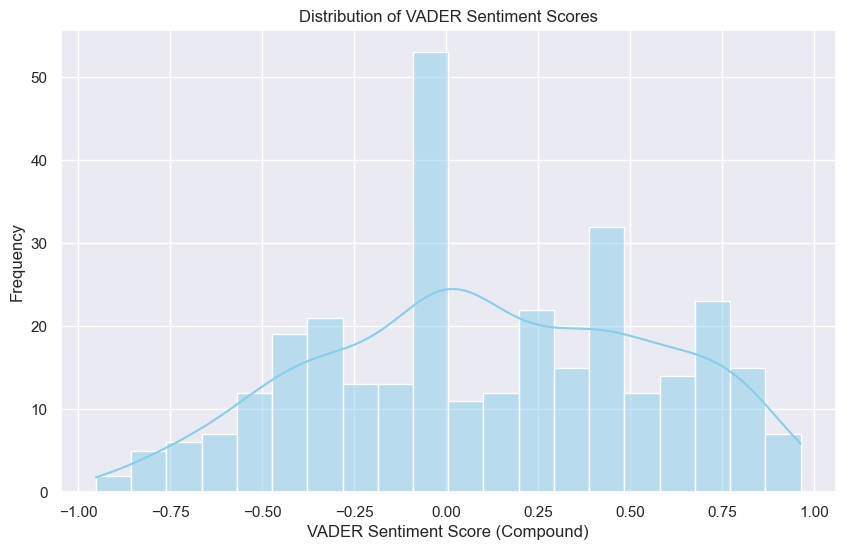

In [91]:
# Droppin null values
bike_survey_london = bike_survey_london.dropna(subset=['Q25-SupportComments', 'VADER_Sentiment_Score'])

# Plotting Distribution of VADER Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(bike_survey_london['VADER_Sentiment_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('VADER Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.show()

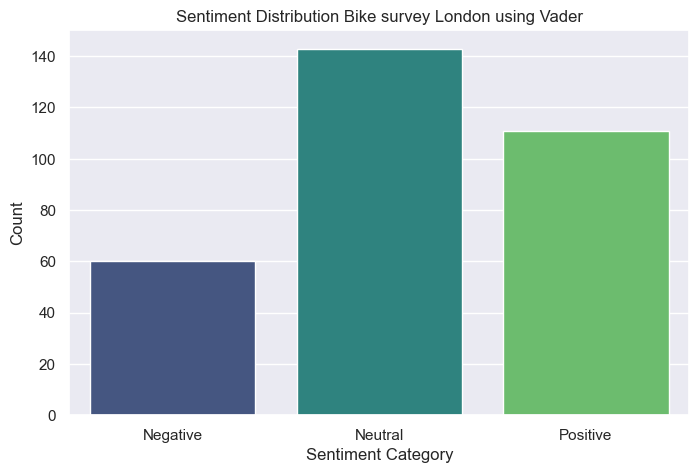

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# create df with sentiment category
bike_survey_london = bike_survey_london.dropna(subset=['Sentiment_Category_VADER'])

# Count the occurrences of each sentiment category
sentiment_counts = bike_survey_london['Sentiment_Category_VADER'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution Bike survey London using Vader')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Dashboard

In [93]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

#### Create dashboard of Model

In [94]:

# Load your datasets
passenger_journey_ireland = pd.read_csv('passenger_journey_ireland.csv')
type_of_transport_london = pd.read_csv('Type_of_Transport_london_melt.csv')

# Random Forest Models
X_rf1 = passenger_journey_ireland[['Week', 'Mode of Transport', 'Year']]
y_rf1 = passenger_journey_ireland['VALUE']
X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(X_rf1, y_rf1, test_size=0.2, random_state=42)
rf_model_ireland = RandomForestRegressor(random_state=42, max_depth=10, min_samples_leaf=1, n_estimators=200)
rf_model_ireland.fit(X_train_rf1, y_train_rf1)

X_rf2 = type_of_transport_london[['Mode of Transport', 'Year', 'Reporting Period', 'Days in period']]
y_rf2 = type_of_transport_london['Value_in_millions']
X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(X_rf2, y_rf2, test_size=0.2, random_state=42)
rf_model_uk = RandomForestRegressor(max_depth=10, min_samples_leaf=1, n_estimators=50)
rf_model_uk.fit(X_train_rf2, y_train_rf2)

# Gradient Boosting Models
X_gb1 = passenger_journey_ireland[['Week', 'Mode of Transport', 'Year']]
y_gb1 = passenger_journey_ireland['VALUE']
X_train_gb1, X_test_gb1, y_train_gb1, y_test_gb1 = train_test_split(X_gb1, y_gb1, test_size=0.2, random_state=42)
gb_regressor_ireland = GradientBoostingRegressor(learning_rate=0.5, max_depth=4, n_estimators=200)
gb_regressor_ireland.fit(X_train_gb1, y_train_gb1)

X_gb2 = type_of_transport_london[['Mode of Transport', 'Year', 'Reporting Period', 'Days in period']]
y_gb2 = type_of_transport_london['Value_in_millions']
X_train_gb2, X_test_gb2, y_train_gb2, y_test_gb2 = train_test_split(X_gb2, y_gb2, test_size=0.2, random_state=42)
gb_regressor_uk = GradientBoostingRegressor(learning_rate=0.5, max_depth=3, n_estimators=200)
gb_regressor_uk.fit(X_train_gb2, y_train_gb2)

# Predictions
y_rf1_pred = rf_model_ireland.predict(X_test_rf1)
y_rf2_pred = rf_model_uk.predict(X_test_rf2)
y_gb1_pred = gb_regressor_ireland.predict(X_test_gb1)
y_gb2_pred = gb_regressor_uk.predict(X_test_gb2)

# Combine actual and predicted values into a DataFrame for each model
results_df_rf1 = pd.DataFrame({'Actual': y_test_rf1, 'Predicted': y_rf1_pred})
results_df_rf2 = pd.DataFrame({'Actual': y_test_rf2, 'Predicted': y_rf2_pred})
results_df_gb1 = pd.DataFrame({'Actual': y_test_gb1, 'Predicted': y_gb1_pred})
results_df_gb2 = pd.DataFrame({'Actual': y_test_gb2, 'Predicted': y_gb2_pred})

# Function to create scatter plot with diagonal line
def create_scatter_plot(df, title, color_sequence):
    scatter_plot = px.scatter(df, x='Actual', y='Actual', title=title, 
                              color_discrete_sequence=[color_sequence], template='seaborn') \
                              .update_traces(marker=dict(size=10, symbol='circle', color="red"), 
                                             mode='markers', name='Actual') \
                              .add_scatter(x=df['Actual'], y=df['Predicted'], mode='markers', 
                                           marker=dict(size=10, symbol='circle', color="blue"), name='Predicted') \
                              .update_layout(shapes=[
                                  dict(
                                      type='line',
                                      x0=df['Actual'].min(),
                                      y0=df['Actual'].min(),
                                      x1=df['Actual'].max(),
                                      y1=df['Actual'].max(),
                                      line=dict(color='black', width=2)
                                  )
                              ])
    return scatter_plot

# Create Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div(children=[
    html.H1(children='Master Data Analytics - CA2', style={'textAlign': 'center', 'color': 'black'}),
    html.H3(children='Transportation Ireland & UK', style={'textAlign': 'center', 'color': 'black'}),

    html.Div(children='''Select Region:'''),
    dcc.Dropdown(
        id='region-dropdown',
        options=[
            {'label': 'Ireland', 'value': 'ireland'},
            {'label': 'UK', 'value': 'uk'}
        ],
        value='ireland'
    ),

    html.Div(children='''Select Model:'''),
    dcc.Dropdown(
        id='model-dropdown',
        options=[
            {'label': 'Random Forest Regressor', 'value': 'random_forest'},
            {'label': 'Gradient Boosting Regressor', 'value': 'gradient_boosting'}
        ],
        value='random_forest'
    ),

    dcc.Graph(
        id='scatter-plot',
        figure=create_scatter_plot(results_df_rf1, 'Random Forest - passenger_journey_ireland', 'red')
    )
])

# Callback to update scatter plot based on dropdown selections
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('region-dropdown', 'value'),
     dash.dependencies.Input('model-dropdown', 'value')]
)
def update_scatter_plot(selected_region, selected_model):
    if selected_region == 'ireland' and selected_model == 'random_forest':
        return create_scatter_plot(results_df_rf1, 'Random Forest - passenger_journey_ireland', 'red')
    elif selected_region == 'uk' and selected_model == 'random_forest':
        return create_scatter_plot(results_df_rf2, 'Random Forest Regressor - type_of_transport_london', 'orange')
    elif selected_region == 'ireland' and selected_model == 'gradient_boosting':
        return create_scatter_plot(results_df_gb1, 'Gradient Boosting Regressor - passenger_journey_ireland', 'green')
    elif selected_region == 'uk' and selected_model == 'gradient_boosting':
        return create_scatter_plot(results_df_gb2, 'Gradient Boosting Regressor - type_of_transport_london', 'purple')
    else:
        return create_scatter_plot(results_df_rf1, 'Random Forest - passenger_journey_ireland', 'red')

# Run the application

if __name__ == '__main__':
    app.run_server(debug=True, host='127.0.0.1', port=8050)